## CLUSTERING ANALYSIS 

##### Understanding and Implementing K-Means and Hierarchical Algorithms

##### Objective:
##### The objective of this assignment is to introduce to various clustering algorithms, including K-Means, and hierarchical and provide hands-on experience in applying these techniques to a real-world dataset.
##### Datasets:
##### Data Preprocessing:
1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
3.	Use multiple visualizations to understand the hidden patterns in the dataset
##### Implementing Clustering Algorithms:
##### •	Implement the K-Means and hierarchical algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.
##### •	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
##### •	Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) evaluate the clustering results.

##### Cluster Analysis and Interpretation:
##### •	Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.

In [1]:
import pandas as pd

In [2]:
df =pd.read_excel("../Clustering/EastWestAirlines.xlsx",sheet_name="data", index_col = "ID#" )
df.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                      
1      28143           0          1          1          1          174   
2      19244           0          1          1          1          215   
3      41354           0          1          1          1         4123   
4      14776           0          1          1          1          500   
5      97752           0          4          1          1        43300   

     Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                       
1              1                  0                0               7000   
2              2                  0                0               6968   
3              4                  0                0               7034   
4              1                  0                0               6952   
5             26               2077                4               6935   

     Award?  
ID#          
1         0  
2         0  
3         0  
4         0  
5         1

In [3]:
df.describe()

Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3.999000e+03   3999.000000  3999.000000  3999.000000  3999.000000   
mean   7.360133e+04    144.114529     2.059515     1.014504     1.012253   
std    1.007757e+05    773.663804     1.376919     0.147650     0.195241   
min    0.000000e+00      0.000000     1.000000     1.000000     1.000000   
25%    1.852750e+04      0.000000     1.000000     1.000000     1.000000   
50%    4.309700e+04      0.000000     1.000000     1.000000     1.000000   
75%    9.240400e+04      0.000000     3.000000     1.000000     1.000000   
max    1.704838e+06  11148.000000     5.000000     3.000000     5.000000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count    3999.000000   3999.00000        3999.000000      3999.000000   
mean    17144.846212     11.60190         460.055764         1.373593   
std     24150.967826      9.60381        1400.209171         3.793172   
min         0.000000      0.00000           0.000000         0.000000   
25%      1250.000000      3.00000           0.000000         0.000000   
50%      7171.000000     12.00000           0.000000         0.000000   
75%     23800.500000     17.00000         311.000000         1.000000   
max    263685.000000     86.00000       30817.000000        53.000000   

       Days_since_enroll       Award?  
count         3999.00000  3999.000000  
mean          4118.55939     0.370343  
std           2065.13454     0.482957  
min              2.00000     0.000000  
25%           2330.00000     0.000000  
50%           4096.00000     0.000000  
75%           5790.50000     1.000000  
max           8296.00000     1.000000

### Data Preprocessing

In [4]:
# 1. Handling missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [6]:
df.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [7]:
df.rename(columns={'Award?':'Award'}, inplace=True)

In [8]:
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
5       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4019    73597           0          3          1          1        25447   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1               1                  0                0               7000   
2               2                  0                0               6968   
3               4                  0                0               7034   
4               1                  0                0               6952   
5              26               2077                4               6935   
...           ...                ...              ...                ...   
4017            4                200                1               1403   
4018            5                  0                0               1395   
4019            8                  0                0               1402   
4020            1                500                1               1401   
4021            0                  0                0               1398   

      Award  
ID#          
1         0  
2         0  
3         0  
4         0  
5         1  
...     ...  
4017      1  
4018      1  
4019      1  
4020      0  
4021      0  

[3999 rows x 11 columns]

In [9]:
df[df.duplicated(keep=False)]

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
3393     1000           0          1          1          1            0   
3899     1000           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
3393            0                  0                0               1597   
3899            0                  0                0               1597   

      Award  
ID#          
3393      0  
3899      0

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
5       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4019    73597           0          3          1          1        25447   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1               1                  0                0               7000   
2               2                  0                0               6968   
3               4                  0                0               7034   
4               1                  0                0               6952   
5              26               2077                4               6935   
...           ...                ...              ...                ...   
4017            4                200                1               1403   
4018            5                  0                0               1395   
4019            8                  0                0               1402   
4020            1                500                1               1401   
4021            0                  0                0               1398   

      Award  
ID#          
1         0  
2         0  
3         0  
4         0  
5         1  
...     ...  
4017      1  
4018      1  
4019      1  
4020      0  
4021      0  

[3998 rows x 11 columns]

In [12]:
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

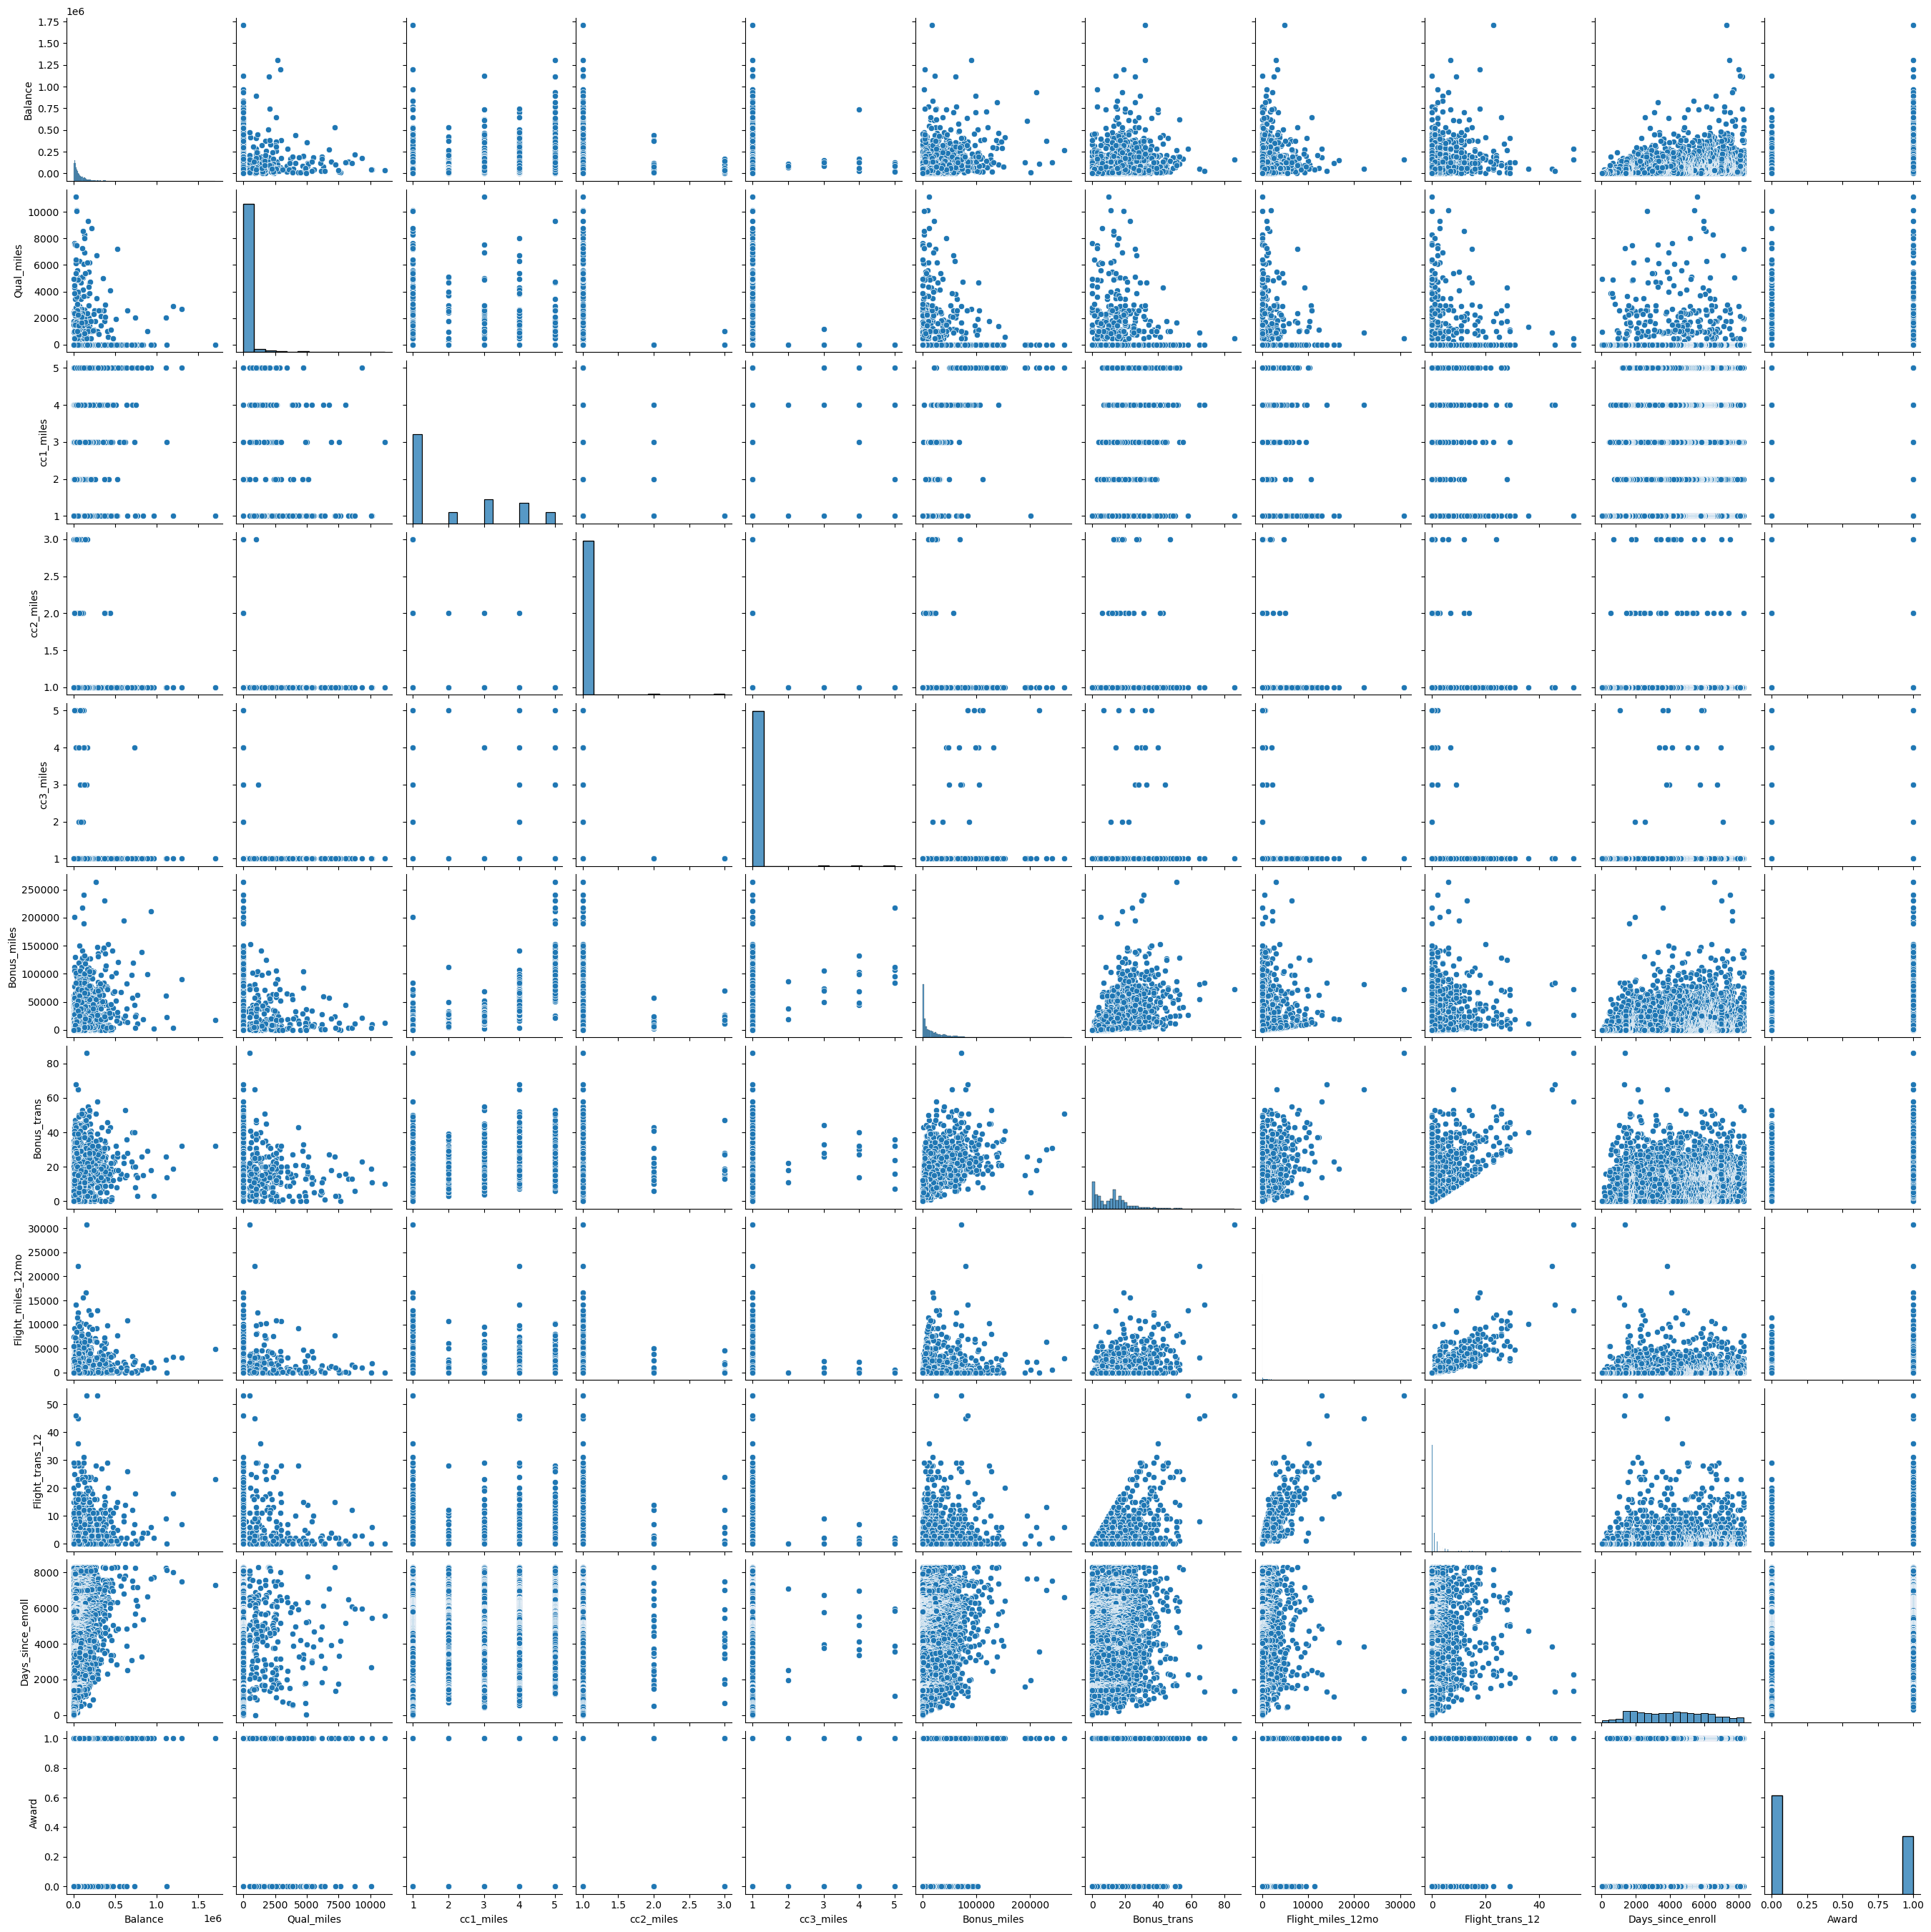

In [13]:
import seaborn as sns
sns.pairplot(df)

In [14]:
df.corr()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Balance            1.000000    0.108696   0.338252  -0.008822   0.035234   
Qual_miles         0.108696    1.000000   0.007896  -0.013928  -0.007782   
cc1_miles          0.338252    0.007896   1.000000  -0.068247   0.060548   
cc2_miles         -0.008822   -0.013928  -0.068247   1.000000  -0.006168   
cc3_miles          0.035234   -0.007782   0.060548  -0.006168   1.000000   
Bonus_miles        0.403410    0.030990   0.825177  -0.003987   0.204136   
Bonus_trans        0.324797    0.050678   0.608867   0.064381   0.097312   
Flight_miles_12mo  0.217509    0.126761   0.037310   0.010590  -0.001783   
Flight_trans_12    0.255656    0.143990   0.041267   0.028276  -0.001122   
Days_since_enroll  0.262975    0.017259   0.230674  -0.005838   0.010815   
Award              0.178380    0.095228   0.335358   0.005314   0.023474   

                   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Balance               0.403410     0.324797           0.217509   
Qual_miles            0.030990     0.050678           0.126761   
cc1_miles             0.825177     0.608867           0.037310   
cc2_miles            -0.003987     0.064381           0.010590   
cc3_miles             0.204136     0.097312          -0.001783   
Bonus_miles           1.000000     0.603114           0.183492   
Bonus_trans           0.603114     1.000000           0.377190   
Flight_miles_12mo     0.183492     0.377190           1.000000   
Flight_trans_12       0.185211     0.432341           0.869189   
Days_since_enroll     0.210232     0.160953           0.037178   
Award                 0.373421     0.333747           0.217671   

                   Flight_trans_12  Days_since_enroll     Award  
Balance                   0.255656           0.262975  0.178380  
Qual_miles                0.143990           0.017259  0.095228  
cc1_miles                 0.041267           0.230674  0.335358  
cc2_miles                 0.028276          -0.005838  0.005314  
cc3_miles                -0.001122           0.010815  0.023474  
Bonus_miles               0.185211           0.210232  0.373421  
Bonus_trans               0.432341           0.160953  0.333747  
Flight_miles_12mo         0.869189           0.037178  0.217671  
Flight_trans_12           1.000000           0.059161  0.247862  
Days_since_enroll         0.059161           1.000000  0.187936  
Award                     0.247862           0.187936  1.000000

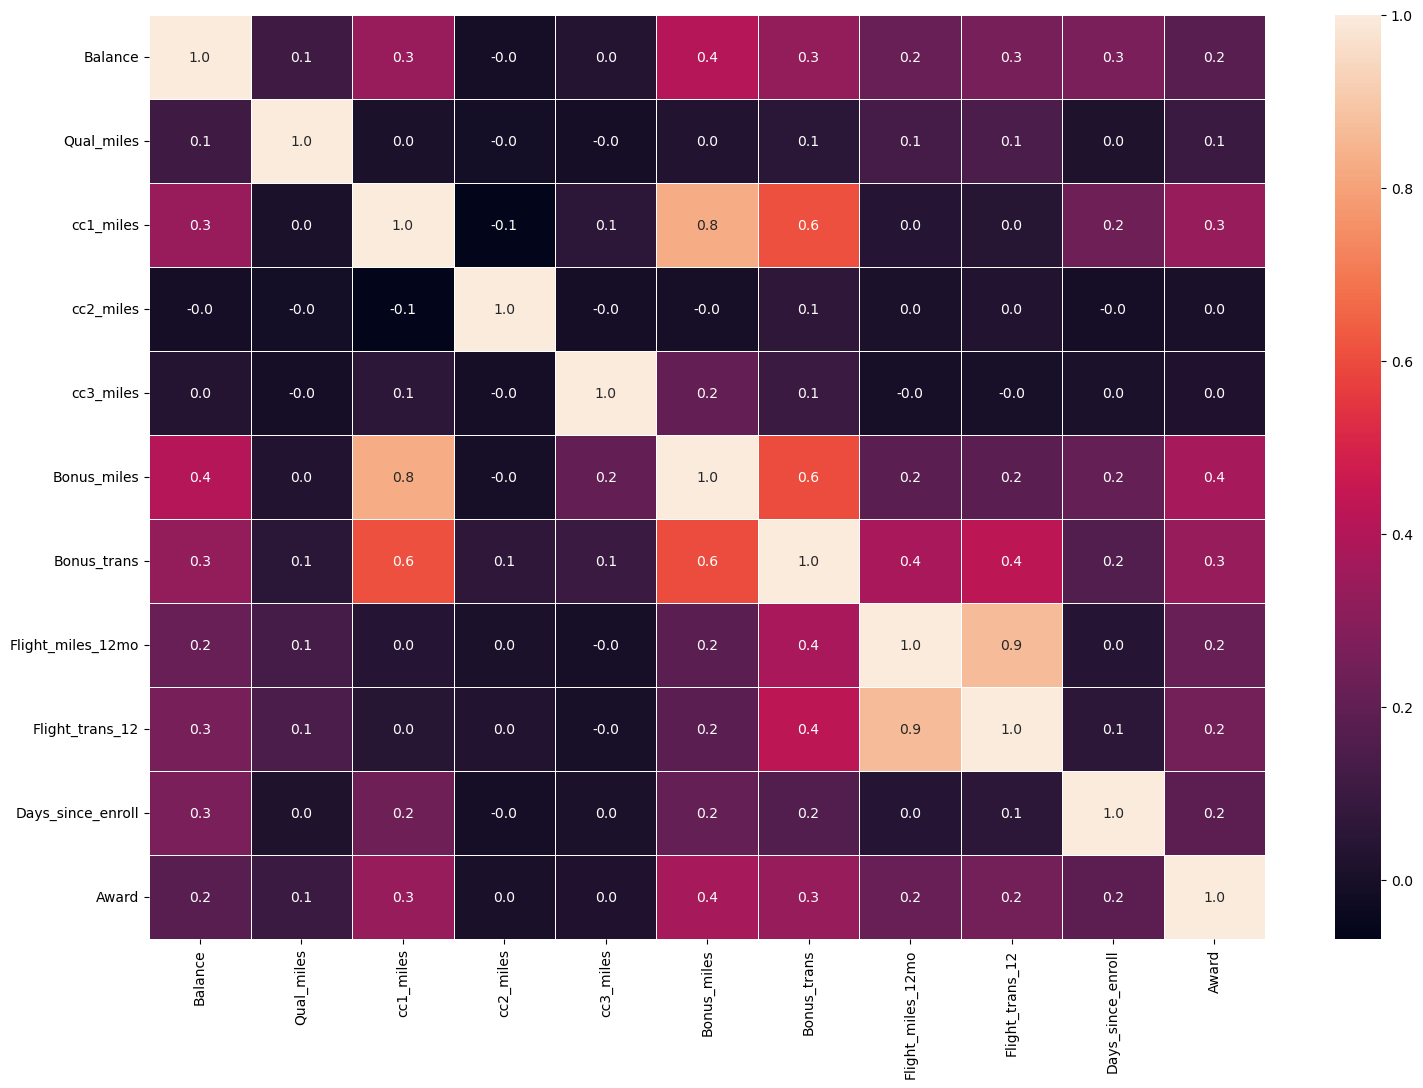

In [15]:
# correlation heatmap
import matplotlib.pyplot as plt
f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

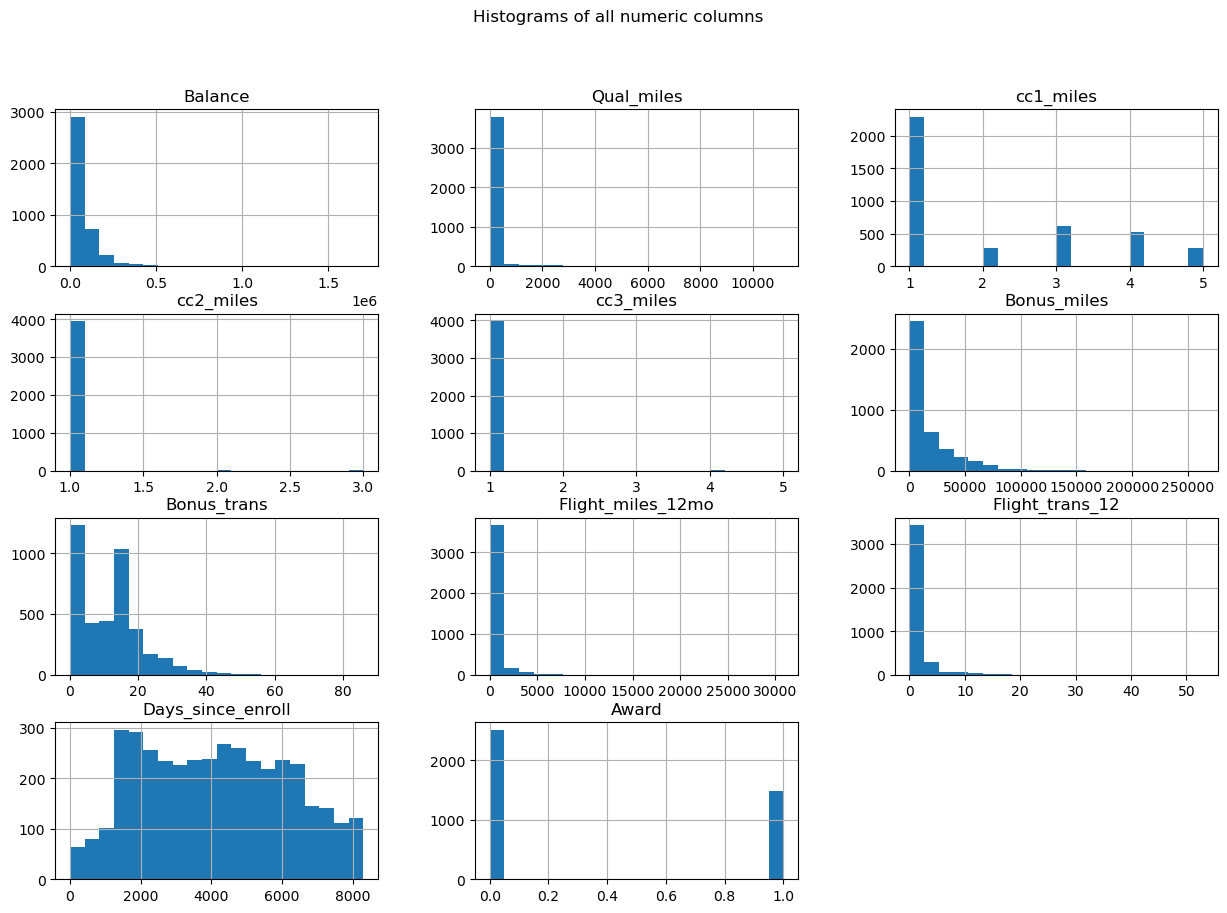

In [16]:
# Plot histograms for data distribution
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of all numeric columns")
plt.show()

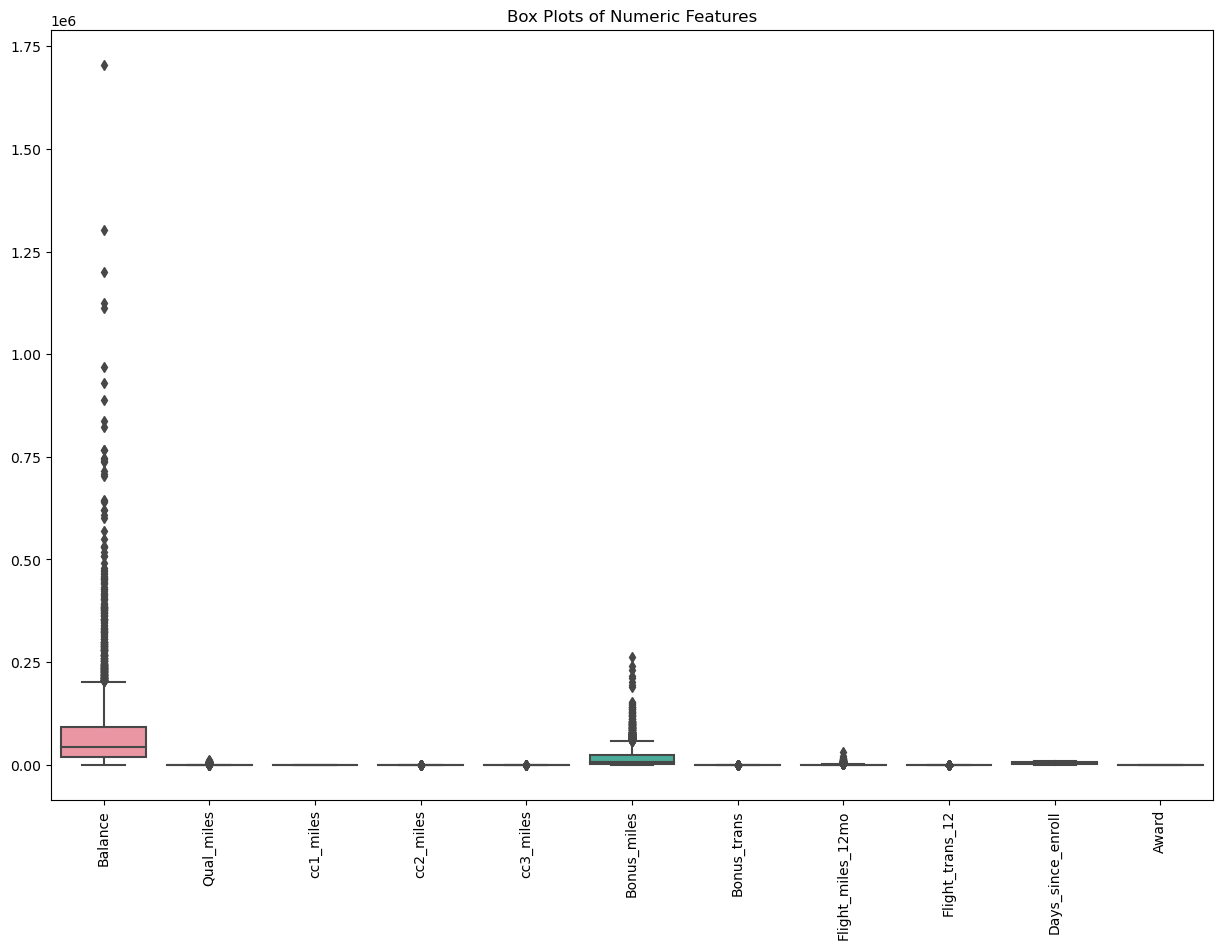

In [17]:
import numpy as np
# Plot box plots for each column to see outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title("Box Plots of Numeric Features")
plt.xticks(rotation=90)
plt.show()

In [18]:
# 2. Remove outliers using Z-score

In [19]:
from scipy.stats import zscore
z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))  # Only apply to numeric columns
df = df[(z_scores < 3).all(axis=1)]

In [20]:
df_outliers =  df[(z_scores > 3).all(axis=1)]

C:\Users\USER\AppData\Local\Temp\ipykernel_28636\1470671065.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_outliers =  df[(z_scores > 3).all(axis=1)]


In [21]:
# Optionally, remove rows with outliers
df_no_outliers = df[(z_scores < 3).all(axis=1)]
df_no_outliers

C:\Users\USER\AppData\Local\Temp\ipykernel_28636\3924396256.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_outliers = df[(z_scores < 3).all(axis=1)]


Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
5       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4019    73597           0          3          1          1        25447   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1               1                  0                0               7000   
2               2                  0                0               6968   
3               4                  0                0               7034   
4               1                  0                0               6952   
5              26               2077                4               6935   
...           ...                ...              ...                ...   
4017            4                200                1               1403   
4018            5                  0                0               1395   
4019            8                  0                0               1402   
4020            1                500                1               1401   
4021            0                  0                0               1398   

      Award  
ID#          
1         0  
2         0  
3         0  
4         0  
5         1  
...     ...  
4017      1  
4018      1  
4019      1  
4020      0  
4021      0  

[3629 rows x 11 columns]

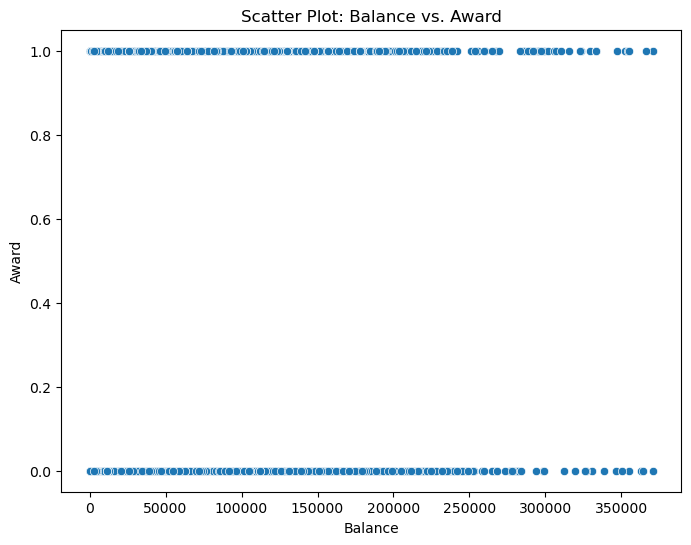

In [22]:
# check balane and award have a co-relation as balance and Award
# Scatter plot for specific columns (e.g., Income vs. Sales) to visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Balance', y='Award', data=df_no_outliers)  # Replace with appropriate columns in your dataset
plt.title("Scatter Plot: Balance vs. Award")
plt.show()

In [23]:
# different cc_miles have different max values.
# so, we want to check what values these columns can take
# to find values of columns 
print('unique_cc1',df_no_outliers.cc1_miles.unique())
print('unique_cc2',df_no_outliers.cc2_miles.unique())
print('unique_cc3',df_no_outliers.cc3_miles.unique())

unique_cc1 [1 4 3 2 5]
unique_cc2 [1]
unique_cc3 [1]


Balance


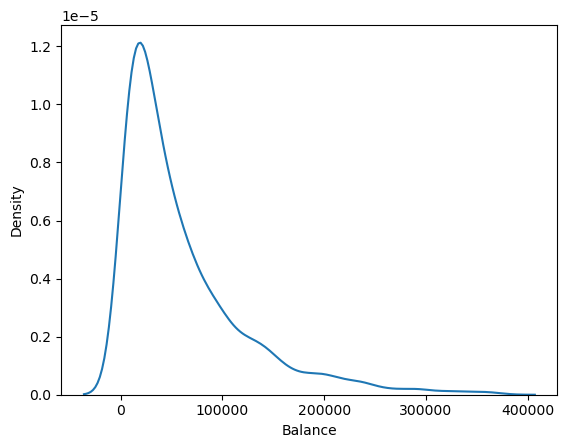

Qual_miles


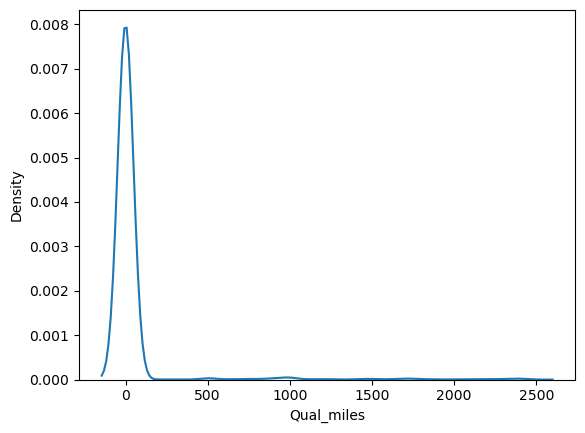

cc1_miles


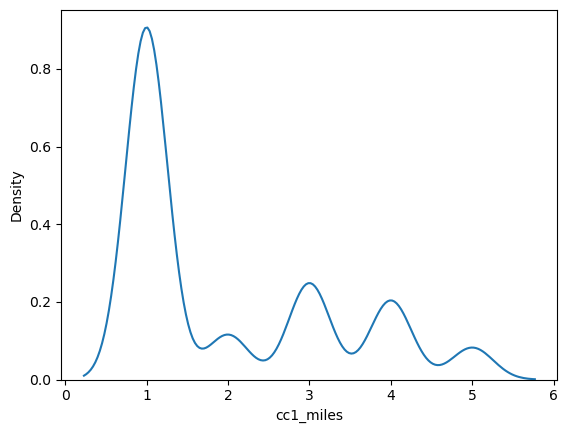

cc2_miles


C:\Users\USER\AppData\Local\Temp\ipykernel_28636\3293783587.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_no_outliers[n])


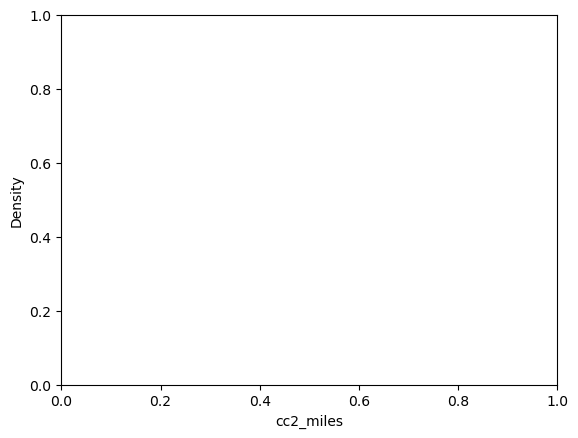

cc3_miles


C:\Users\USER\AppData\Local\Temp\ipykernel_28636\3293783587.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_no_outliers[n])


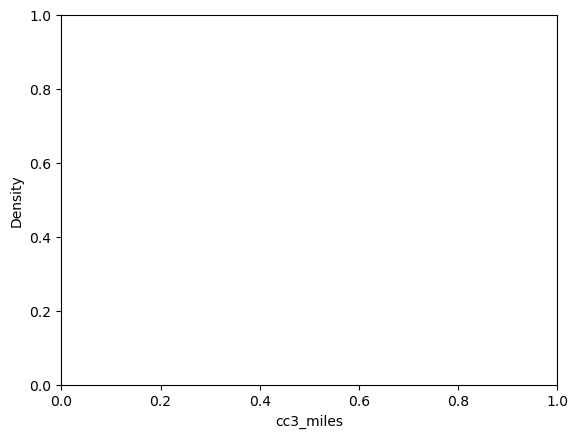

Bonus_miles


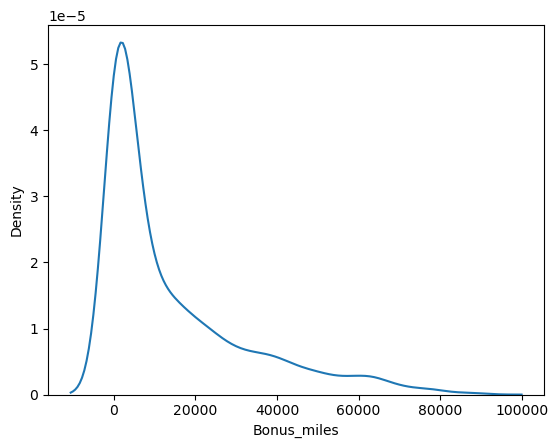

Bonus_trans


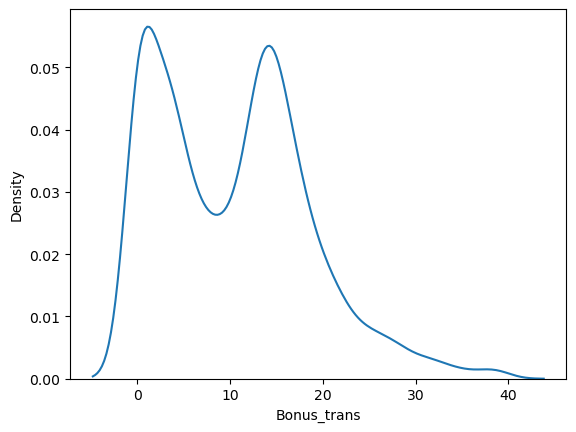

Flight_miles_12mo


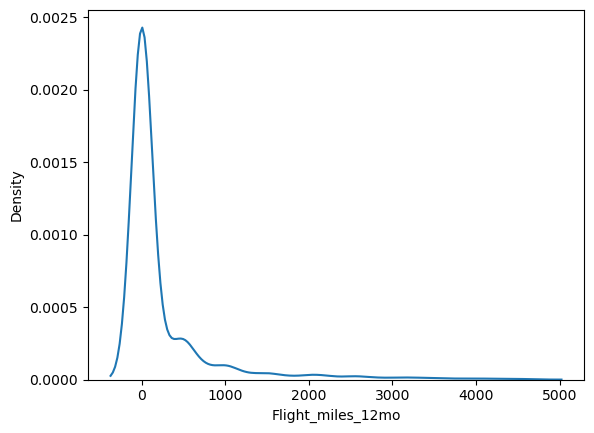

Flight_trans_12


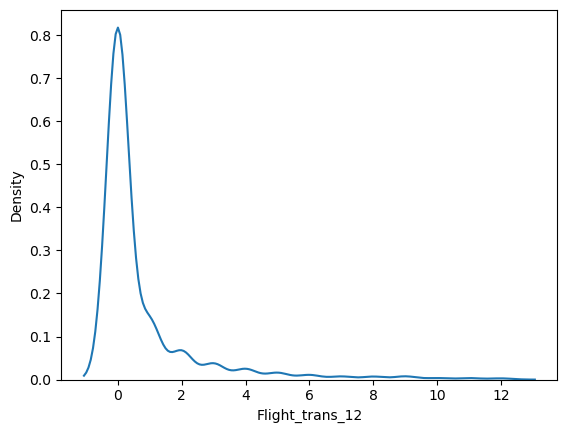

Days_since_enroll


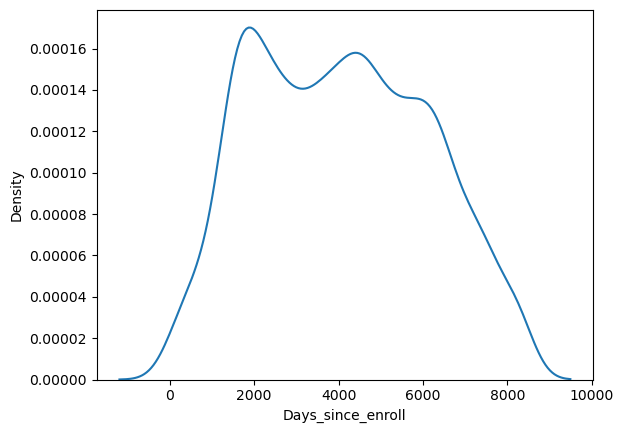

Award


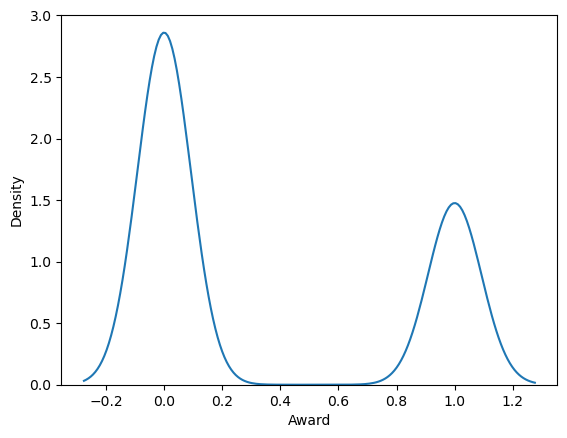

In [24]:
  # Kernel Density for every feature, singled out

for n in df.columns:
    print(n)
    sns.kdeplot(df_no_outliers[n])
    plt.show()

In [25]:
countNotermdeposit = len(df_no_outliers[df_no_outliers.Award == 0])
counthavetermdeposit = len(df_no_outliers[df_no_outliers.Award == 1])
print("Percentage of Customer doesn't have a Award: {:.2f}%".format((countNotermdeposit / (len(df.Award))*100)))
print("Percentage of Customer does have a Award: {:.2f}%".format((counthavetermdeposit / (len(df.Award))*100)))

Percentage of Customer doesn't have a Award: 65.97%
Percentage of Customer does have a Award: 34.03%


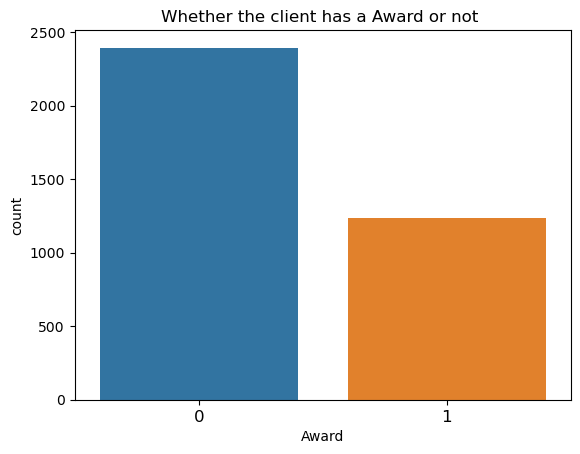

In [26]:
sns.countplot(x='Award', data=df_no_outliers, 
              order=df_no_outliers['Award'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Whether the client has a Award or not ')
plt.show()

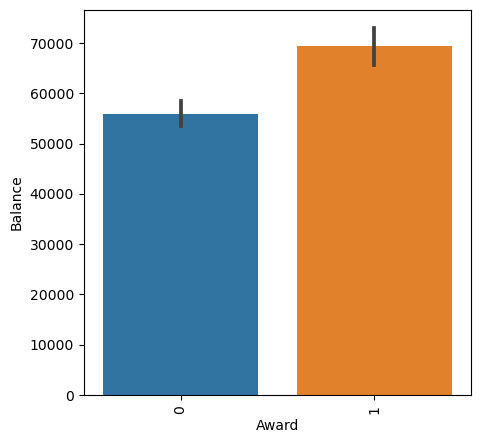

In [27]:
# Balance : Number of miles eligible for award travel

plt.figure(figsize = (5,5))
Balance = df_no_outliers[['Award','Balance']].sort_values('Balance', ascending = False)
ax = sns.barplot(x='Award', y='Balance', data= Balance)
ax.set(xlabel = 'Award', ylabel= 'Balance')
plt.xticks(rotation=90)
plt.show()

In [28]:
# what is correlated with Balance?

corr_matrix = df_no_outliers.corr()
corr_matrix["Balance"].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.458540
cc1_miles            0.424112
Bonus_trans          0.354041
Days_since_enroll    0.252588
Flight_trans_12      0.199135
Flight_miles_12mo    0.195665
Award                0.103752
Qual_miles           0.062069
cc2_miles                 NaN
cc3_miles                 NaN
Name: Balance, dtype: float64

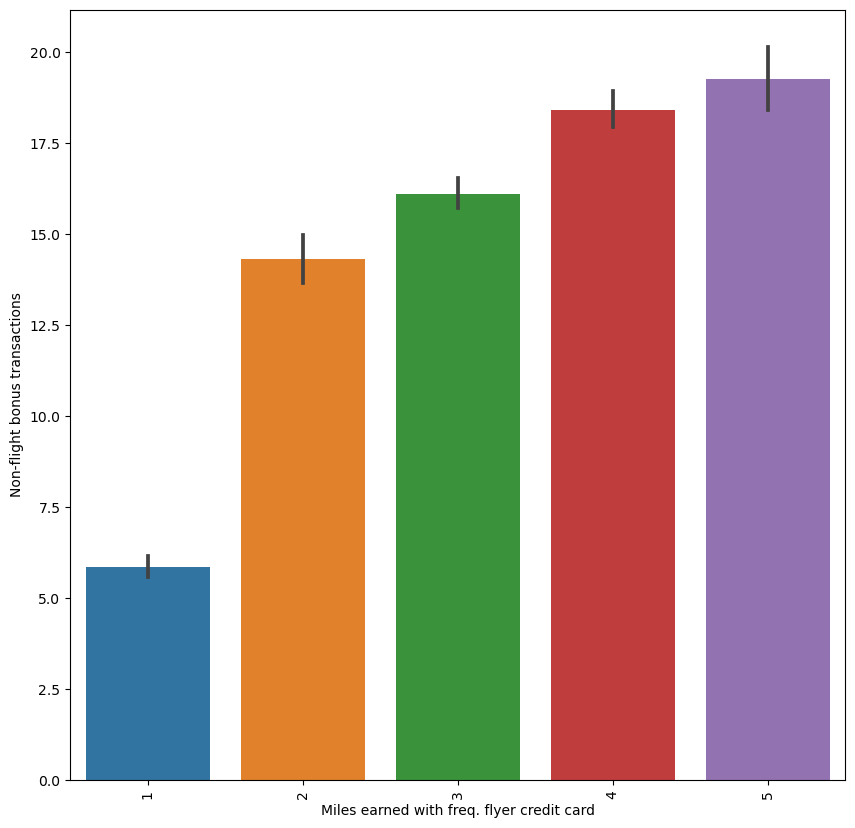

In [29]:
# Plotting frequent flying bonuses vs. non-flight bonus transactions 
plt.figure(figsize = (10,10))
sorted_data = df_no_outliers[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

In [30]:
# 3. Feature scaling

In [31]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
scaled_df = standard_scaler.fit_transform(df_no_outliers.select_dtypes(include=[np.number]))
scaled_df.shape

(3629, 11)

In [32]:
scaled_df

array([[-0.52352013, -0.15889156, -0.75582797, ..., -0.43184564,
         1.43119401, -0.71824301],
       [-0.66734242, -0.15889156, -0.75582797, ..., -0.43184564,
         1.41560321, -0.71824301],
       [-0.31000892, -0.15889156, -0.75582797, ..., -0.43184564,
         1.44775922, -0.71824301],
       ...,
       [ 0.2110903 , -0.15889156,  0.75958623, ..., -0.43184564,
        -1.29622023,  1.39228644],
       [-0.09109974, -0.15889156, -0.75582797, ...,  0.11803781,
        -1.29670745, -0.71824301],
       [-0.92961324, -0.15889156, -0.75582797, ..., -0.43184564,
        -1.29816908, -0.71824301]])

In [33]:
std_df = np.array(scaled_df)

In [34]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
cluster_range = range(1,10)
cluster_errors = []
try:
    for num_clusters in cluster_range:
        clusters = KMeans(n_clusters=num_clusters, n_init=10)
        clusters.fit(std_df)
        labels = clusters.labels_
        centroids = clusters.cluster_centers_
        cluster_errors.append(clusters.inertia_)
except AttributeError as e:
    print("An AttributeError occurred:", e)


    num_clusters  cluster_errors
0              1    32661.000000
1              2    24509.741436
2              3    20017.896638
3              4    17328.015305
4              5    15636.667816
5              6    13943.434622
6              7    12780.997590
7              8    11933.166547
8              9    11351.969189
9             10    10748.193520
10            11    10291.896200
11            12     9795.171002
12            13     9364.694619
13            14     9134.433155


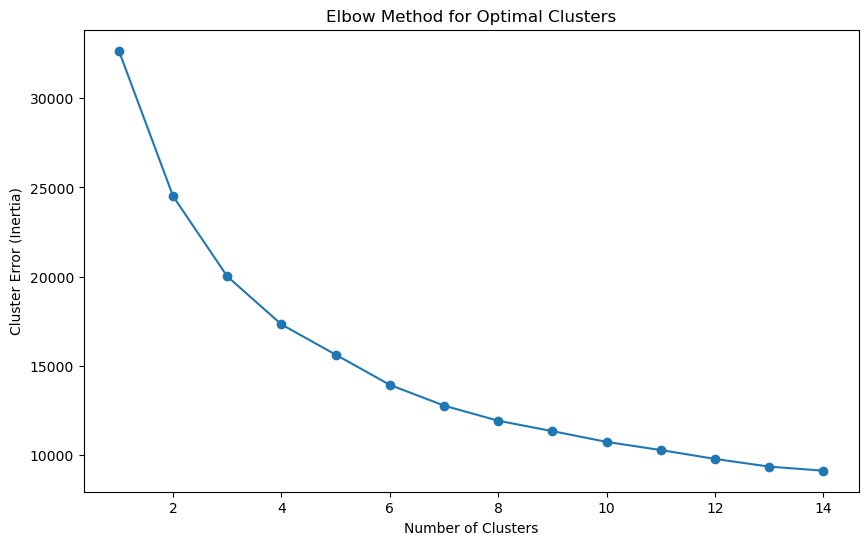

In [35]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the range for the number of clusters
cluster_range = range(1, 15)
cluster_errors = []

# Calculate the inertia (sum of squared distances) for each number of clusters
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
    kmeans.fit(std_df)
    cluster_errors.append(kmeans.inertia_)  # Inertia represents the cluster error

# Create a DataFrame to store the results
clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
print(clusters_df)
# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(clusters_df["num_clusters"], clusters_df["cluster_errors"], marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Cluster Error (Inertia)")
plt.title("Elbow Method for Optimal Clusters")
plt.show()


In [36]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(std_df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(std_df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

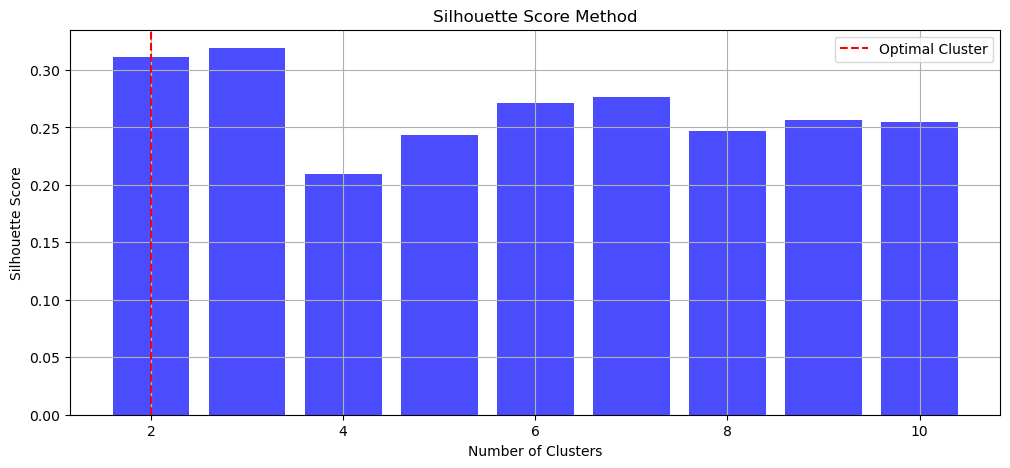

In [37]:
# Plotting the bar plot
plt.figure(figsize=(12, 5))
plt.bar(n_clusters, s_scores, color='blue', alpha=0.7)
plt.title("Silhouette Score Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.axvline(2, ls="--", color="red", label="Optimal Cluster")
plt.legend()
plt.grid(True)
plt.show()

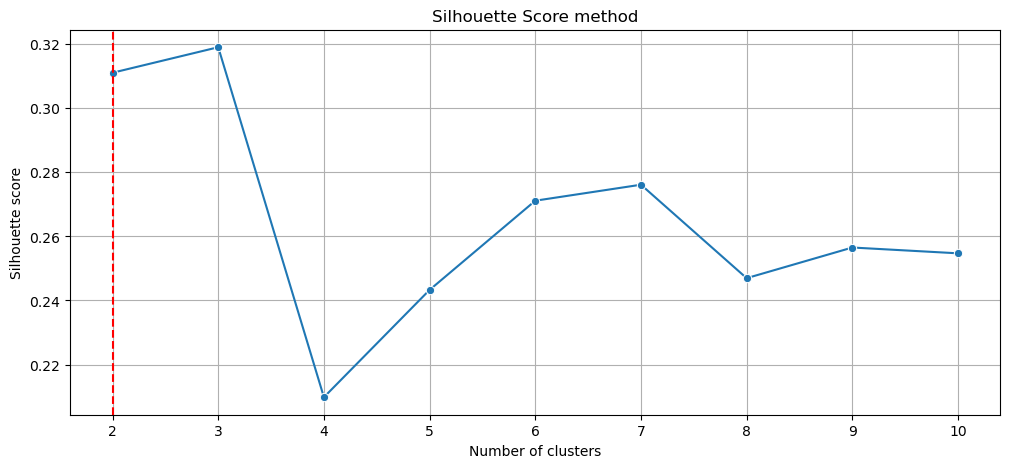

In [38]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(x=n_clusters, y=s_scores, marker='o', ax=ax)
ax.set_title("Silhouette Score method")
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

Elbow Plot for Standard Scaler data


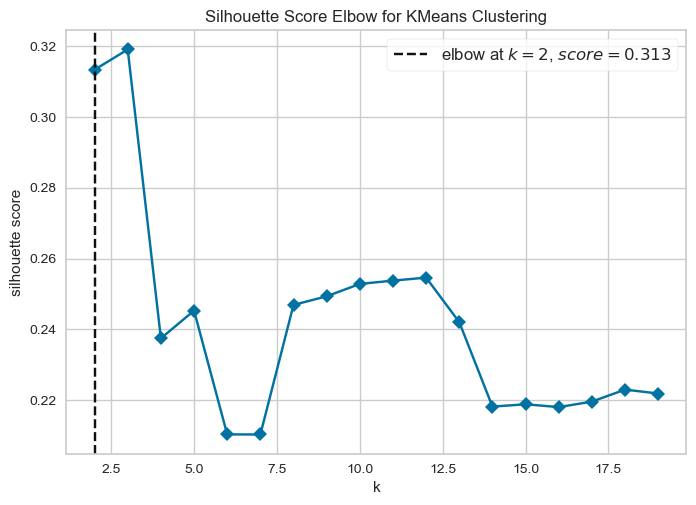

In [39]:
# 1. How many number of clusters? n_clusters?

# Since true labels are not known..we will use Silhouette Coefficient (Clustering performance evaluation)
# knee Elbow graph method

from yellowbrick.cluster import KElbowVisualizer
# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
print('Elbow Plot for Standard Scaler data')
visualizer.fit(std_df)    
visualizer.poof()
plt.show()

In [40]:
# With the elbow method, the ideal number of clusters to use was 6.
# We will also use the Silhouette score to determine an optimal number.
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples
clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(std_df)
    sil_score1= sil(std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.3133542480163761
For n_clusters = 3 The average silhouette_score is : 0.31904494602107936
For n_clusters = 4 The average silhouette_score is : 0.28140044334948583
For n_clusters = 5 The average silhouette_score is : 0.2698659443336469
For n_clusters = 6 The average silhouette_score is : 0.27777998328918374
For n_clusters = 7 The average silhouette_score is : 0.2768480530520939
For n_clusters = 8 The average silhouette_score is : 0.24088603927177837
For n_clusters = 9 The average silhouette_score is : 0.24746036563672064


For n_clusters = 2 The average silhouette_score is : 0.3133542480163761
For n_clusters = 3 The average silhouette_score is : 0.31904494602107936
For n_clusters = 4 The average silhouette_score is : 0.28140044334948583
For n_clusters = 5 The average silhouette_score is : 0.2698659443336469
For n_clusters = 6 The average silhouette_score is : 0.27777998328918374
For n_clusters = 7 The average silhouette_score is : 0.2768480530520939
For n_clusters = 8 The average silhouette_score is : 0.24088603927177837
For n_clusters = 9 The average silhouette_score is : 0.24746036563672064


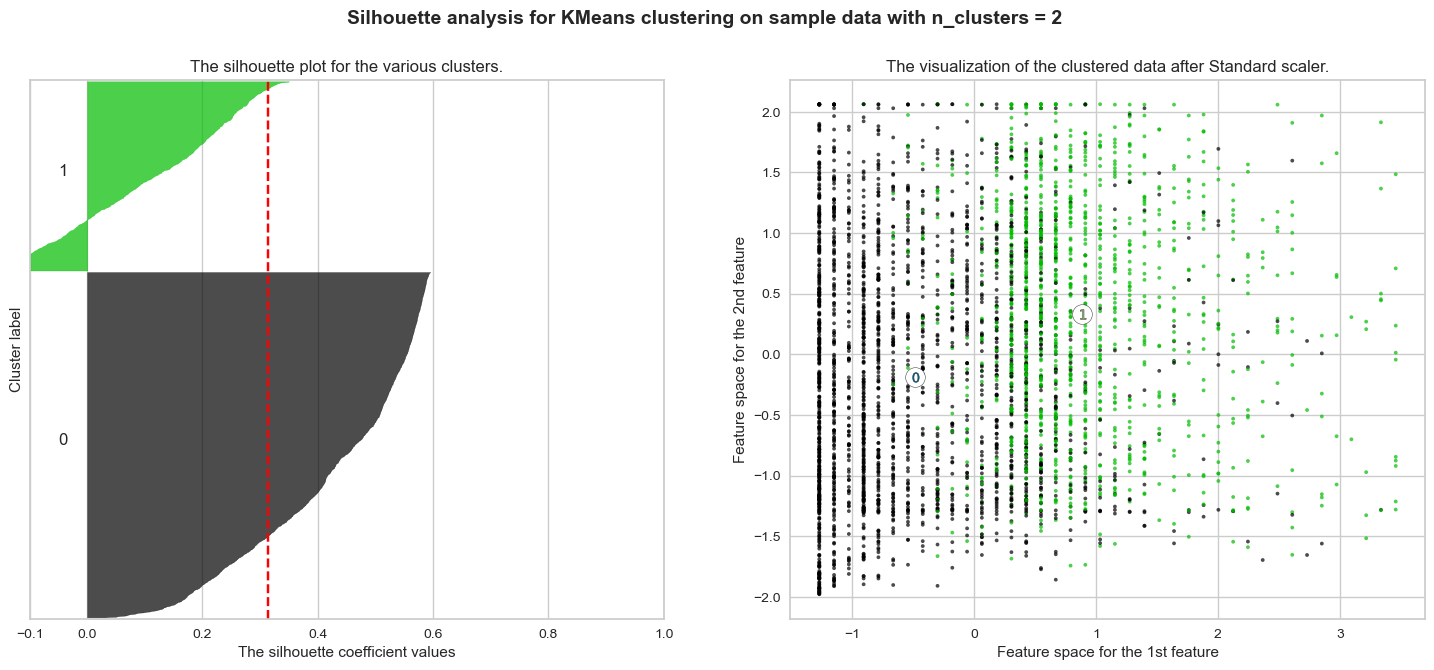

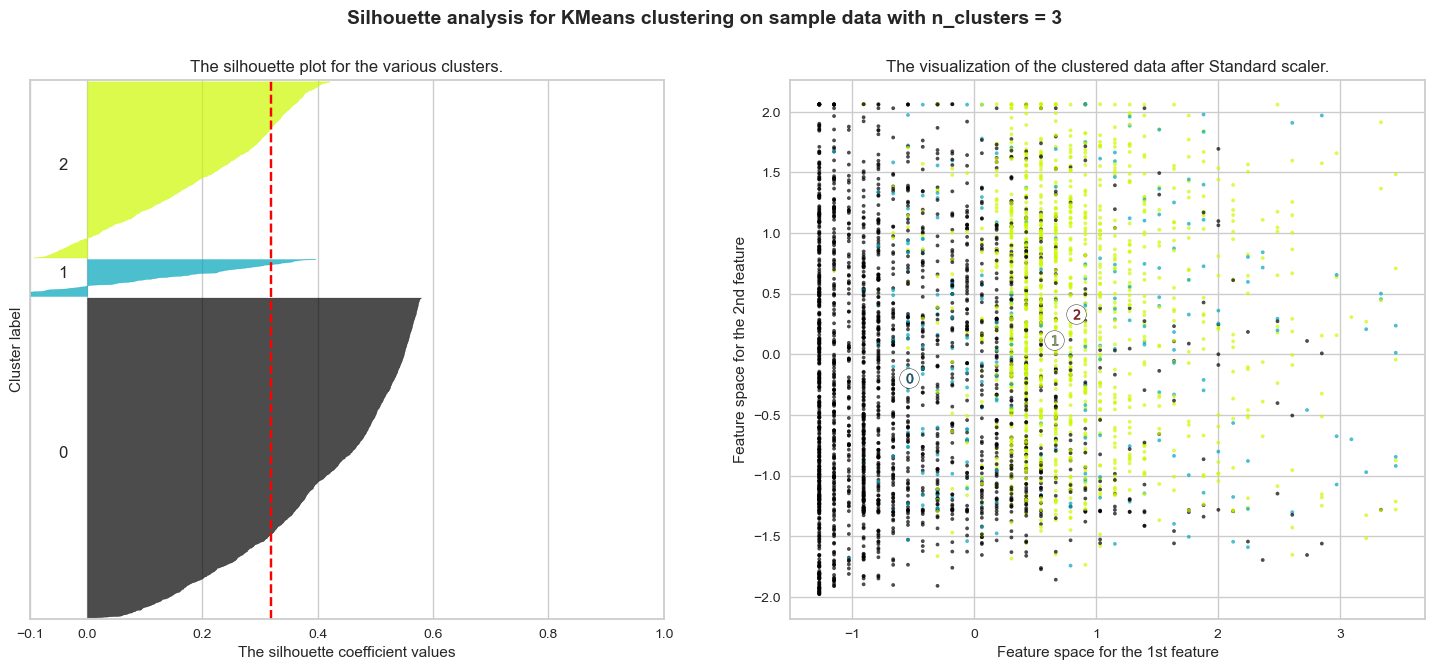

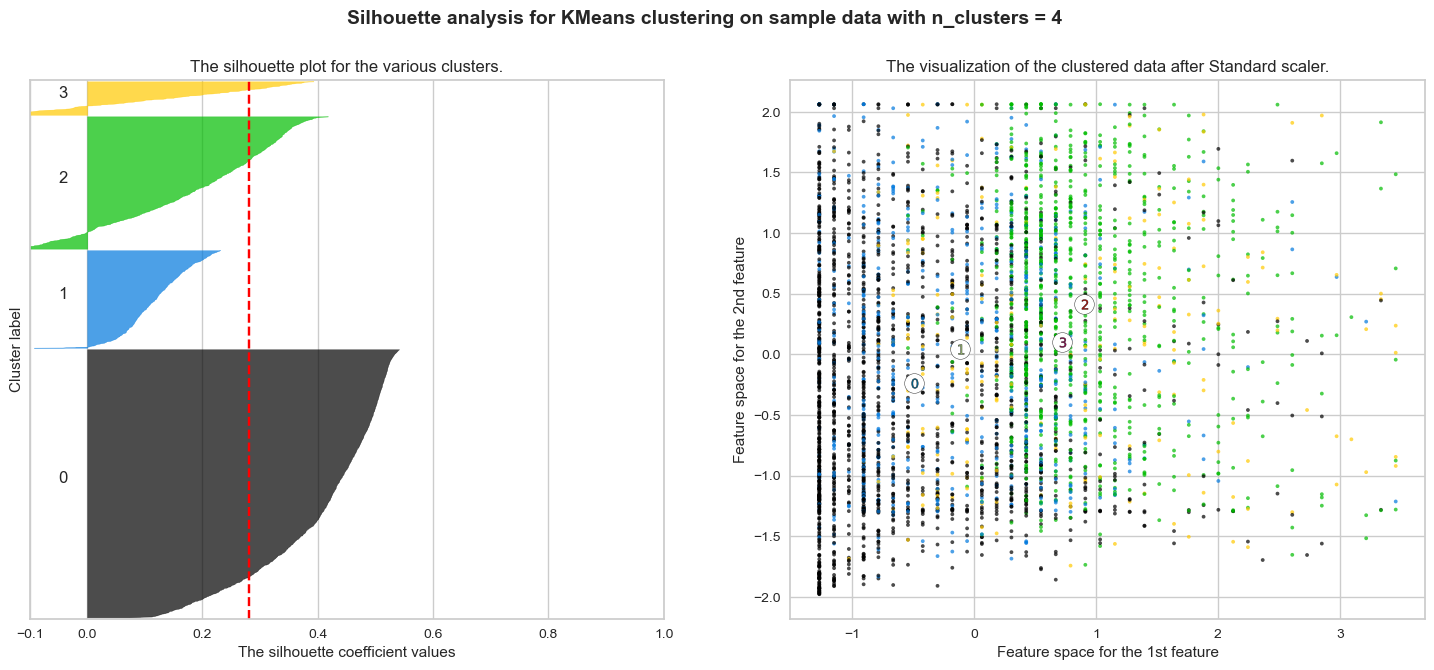

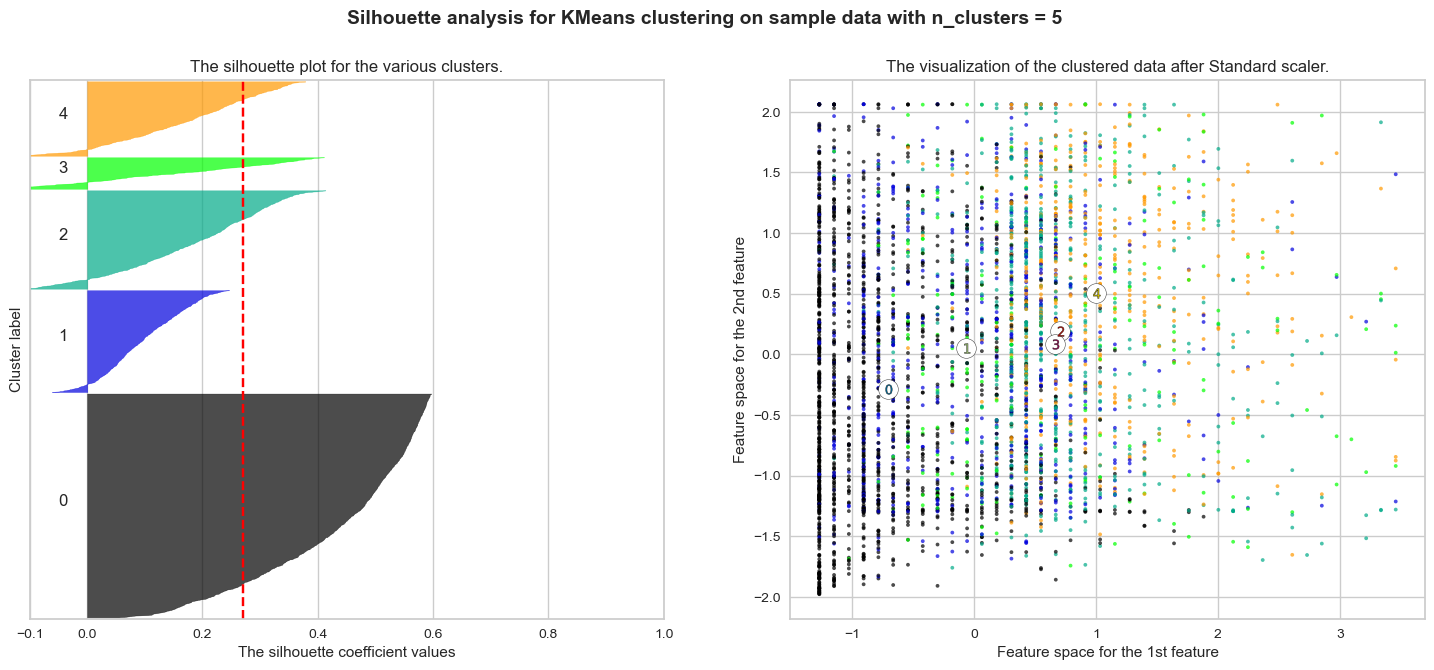

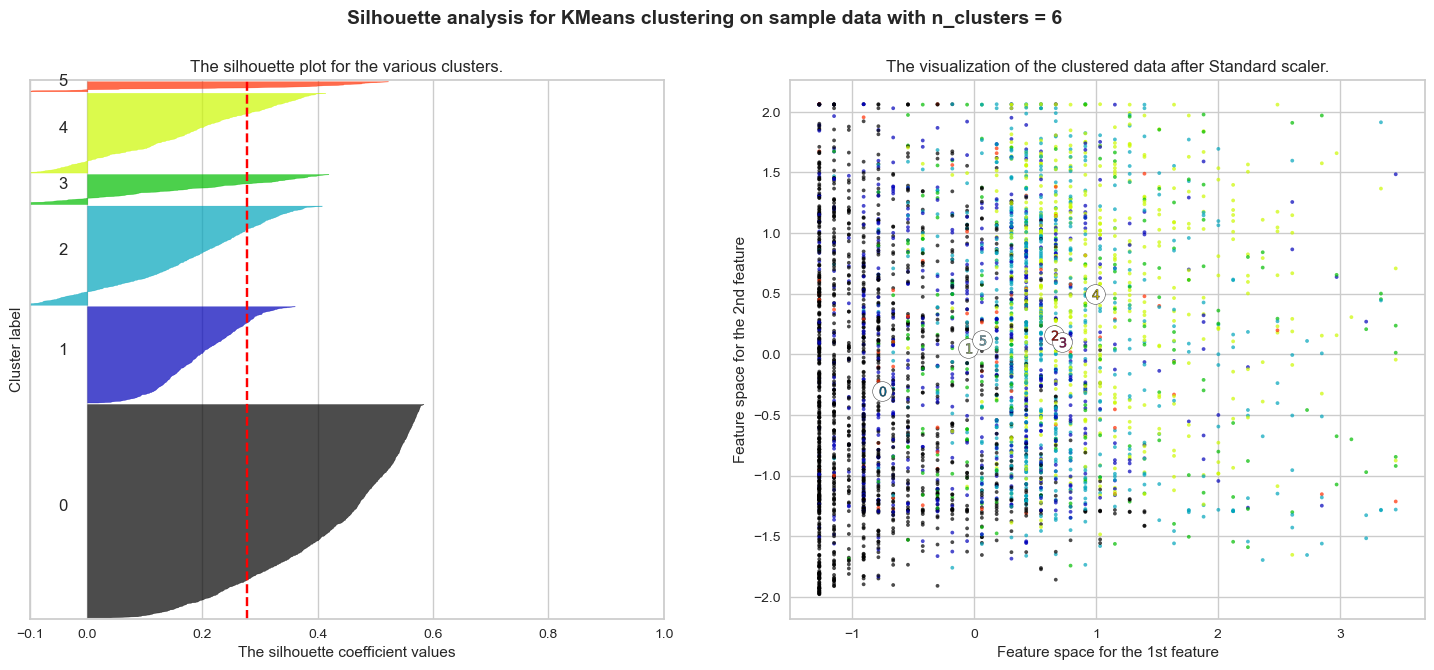

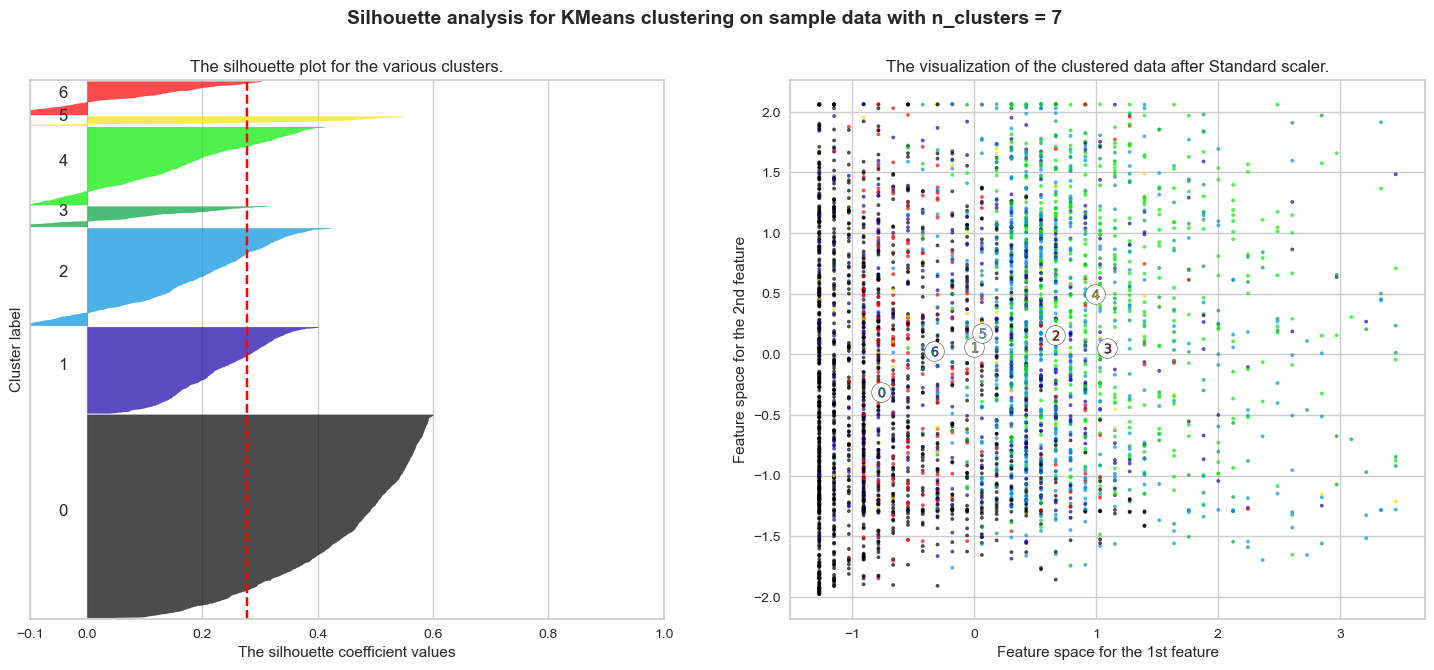

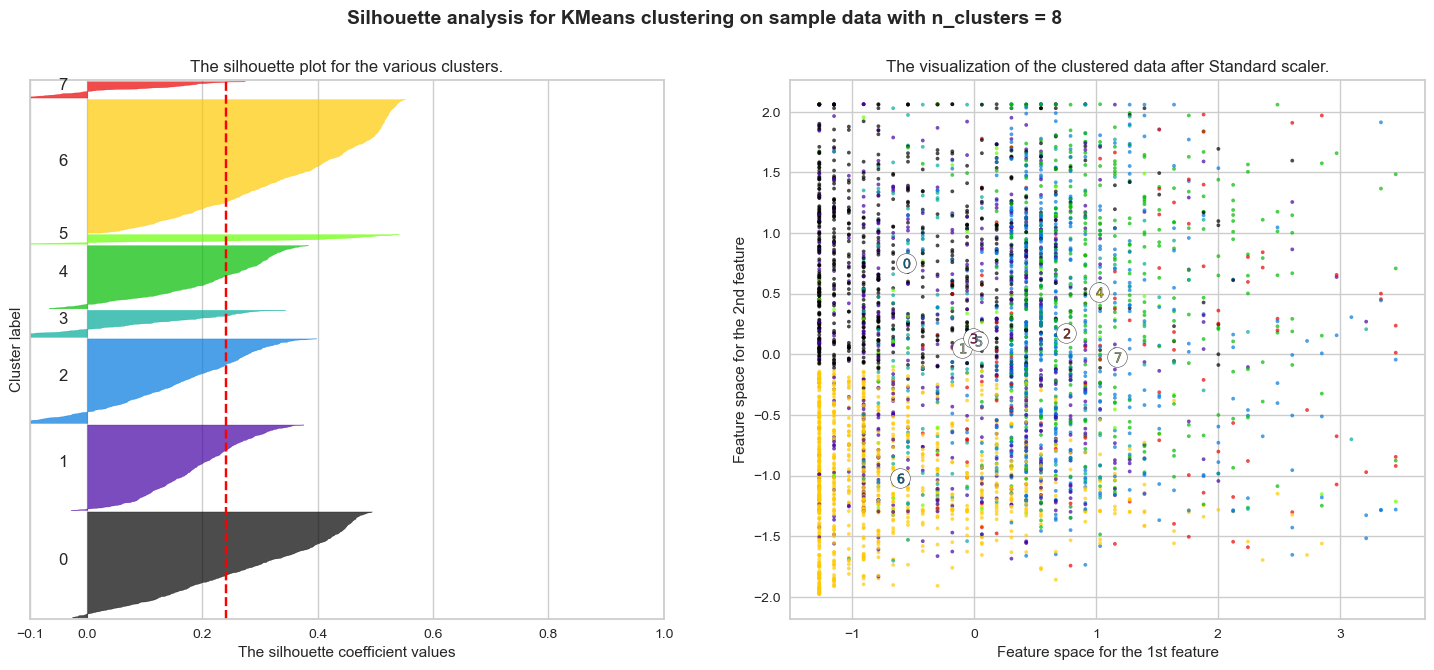

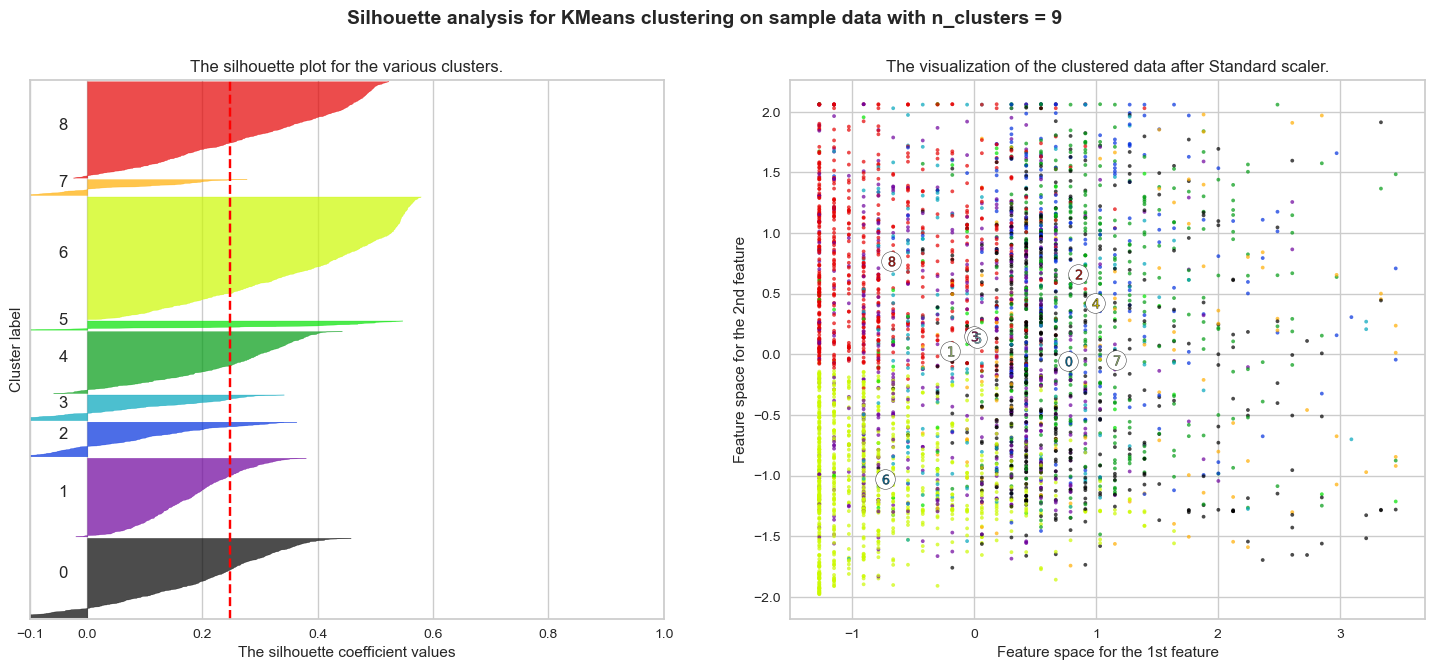

In [41]:
import matplotlib.cm as cm
range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(std_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(std_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = sil(std_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(std_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(std_df[:,6], std_df[:, 9], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,6], centers[:,9], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data after Standard scaler.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [42]:
# we have found good number of cluster = 2
# model building using cluster numbers = 2

model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_df)
y_predict_kmeans.shape

(3629,)

In [43]:
y_predict_kmeans

array([0, 0, 0, ..., 1, 0, 0])

In [44]:
model_kmeans.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [45]:
model_kmeans.cluster_centers_

array([[-0.34955726, -0.02581825, -0.60202474,  0.        ,  0.        ,
        -0.56310943, -0.4869577 , -0.17178488, -0.1762495 , -0.18415108,
        -0.3096373 ],
       [ 0.6384048 ,  0.04715249,  1.09949222,  0.        ,  0.        ,
         1.02842025,  0.88934254,  0.31373484,  0.32188868,  0.33631953,
         0.56549804]])

In [46]:
model_kmeans.inertia_

24509.741435937063

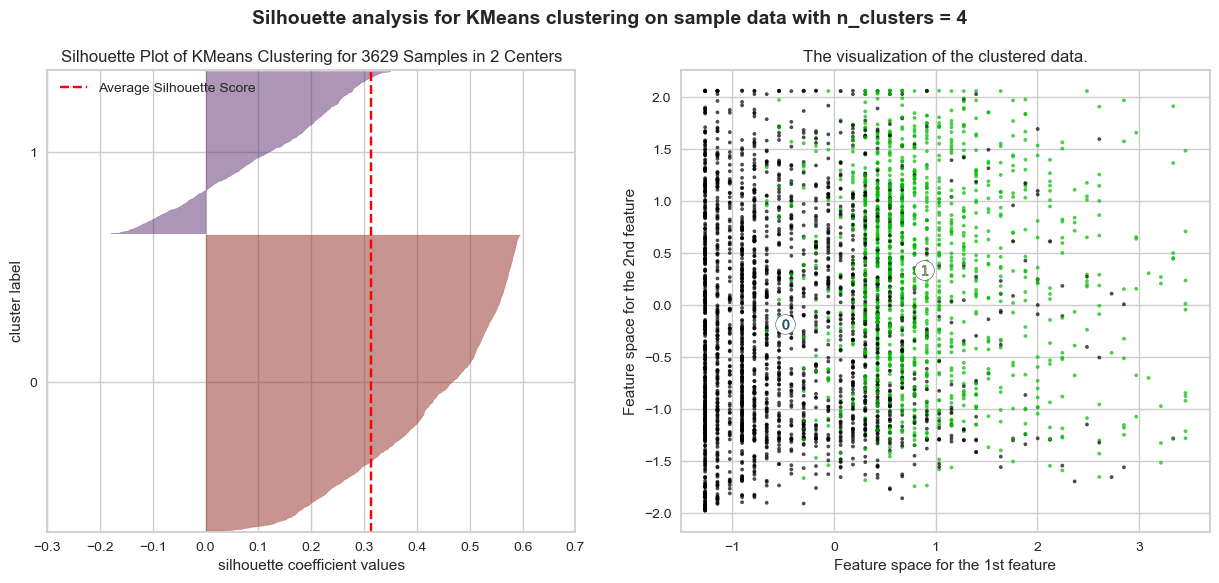

In [47]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)



sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a'])
sil_visualizer1.fit(std_df)


# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 2) # 2 is number of clusters
ax2.scatter(std_df[:, 6], std_df[:, 9], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 6], centers1[:, 9], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 4),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

In [48]:
df['Kmeans_label'] = model_kmeans.labels_

C:\Users\USER\AppData\Local\Temp\ipykernel_28636\3299629298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Kmeans_label'] = model_kmeans.labels_


In [49]:
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
5       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4019    73597           0          3          1          1        25447   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1               1                  0                0               7000   
2               2                  0                0               6968   
3               4                  0                0               7034   
4               1                  0                0               6952   
5              26               2077                4               6935   
...           ...                ...              ...                ...   
4017            4                200                1               1403   
4018            5                  0                0               1395   
4019            8                  0                0               1402   
4020            1                500                1               1401   
4021            0                  0                0               1398   

      Award  Kmeans_label  
ID#                        
1         0             0  
2         0             0  
3         0             0  
4         0             0  
5         1             1  
...     ...           ...  
4017      1             0  
4018      1             0  
4019      1             1  
4020      0             0  
4021      0             0  

[3629 rows x 12 columns]

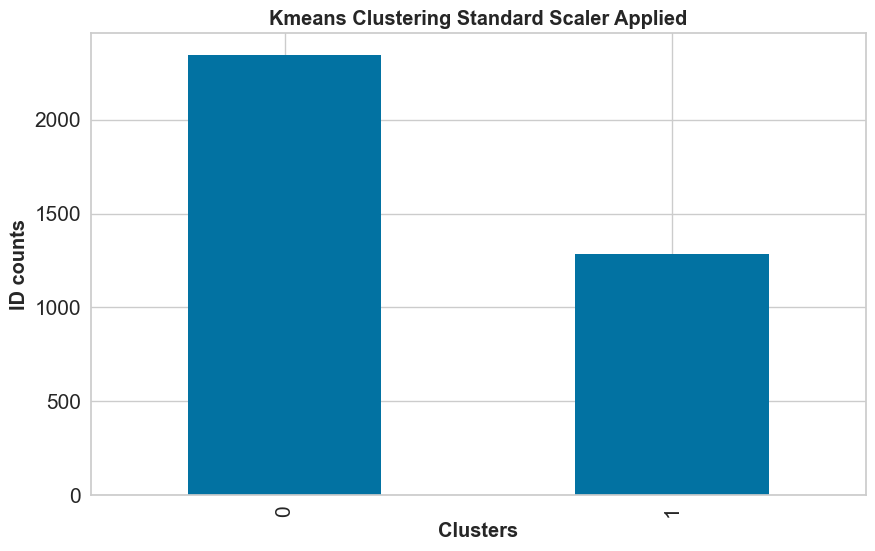

In [50]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster
df=df.reset_index()
fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(['Kmeans_label']).count()['ID#'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering Standard Scaler Applied',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [51]:
# Group data by Clusters (K=2)
df.groupby('Kmeans_label').agg(['mean'])

ID#        Balance Qual_miles cc1_miles cc2_miles  \
                     mean           mean       mean      mean      mean   
Kmeans_label                                                              
0             2245.007253   38898.140358  33.175768  1.203072       1.0   
1             1673.452918  100005.567315  51.305837  3.446693       1.0   

             cc3_miles   Bonus_miles Bonus_trans Flight_miles_12mo  \
                  mean          mean        mean              mean   
Kmeans_label                                                         
0                  1.0   4090.944113    6.443259        146.623720   
1                  1.0  32931.403113   17.807004        455.453696   

             Flight_trans_12 Days_since_enroll     Award  
                        mean              mean      mean  
Kmeans_label                                              
0                   0.465017       3683.325085  0.193259  
1                   1.369650       4754.115953  0.608560

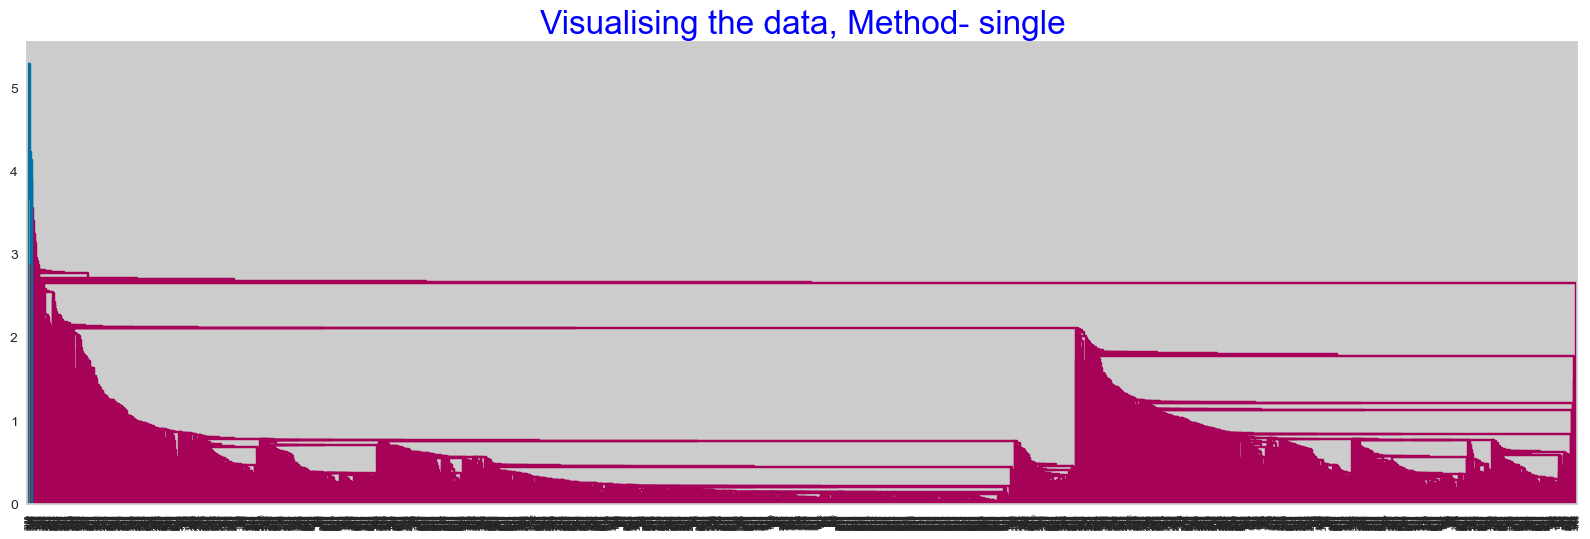

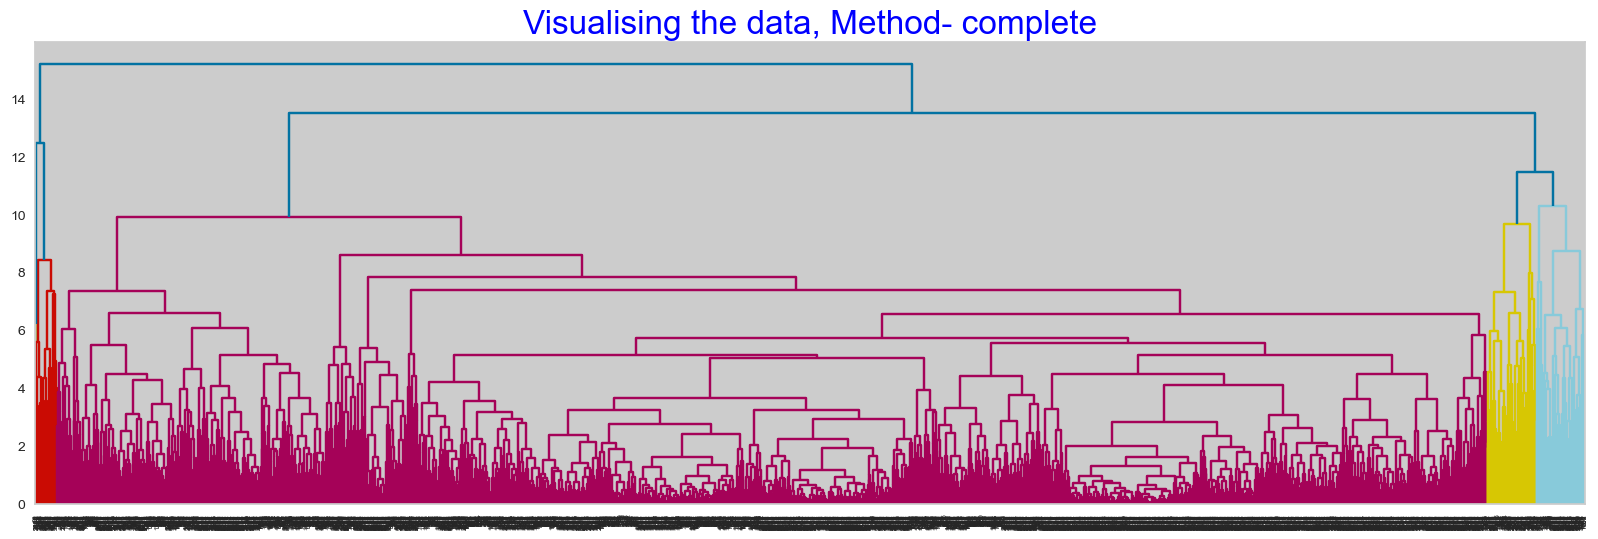

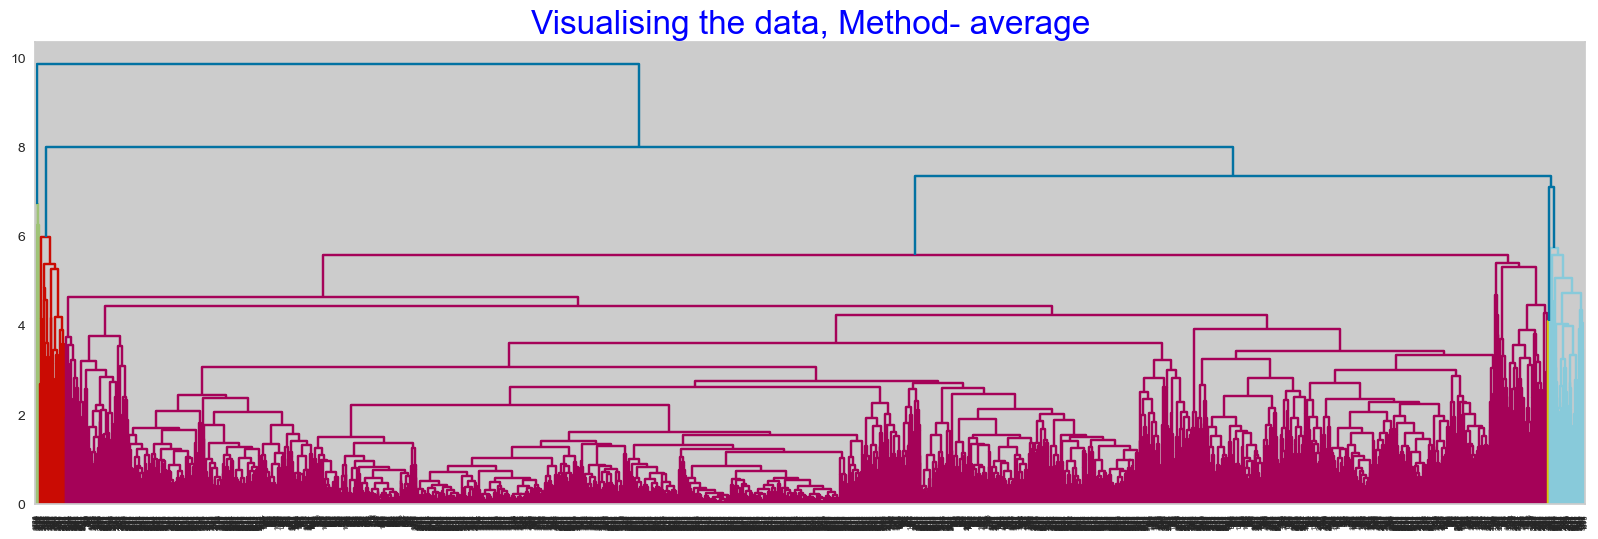

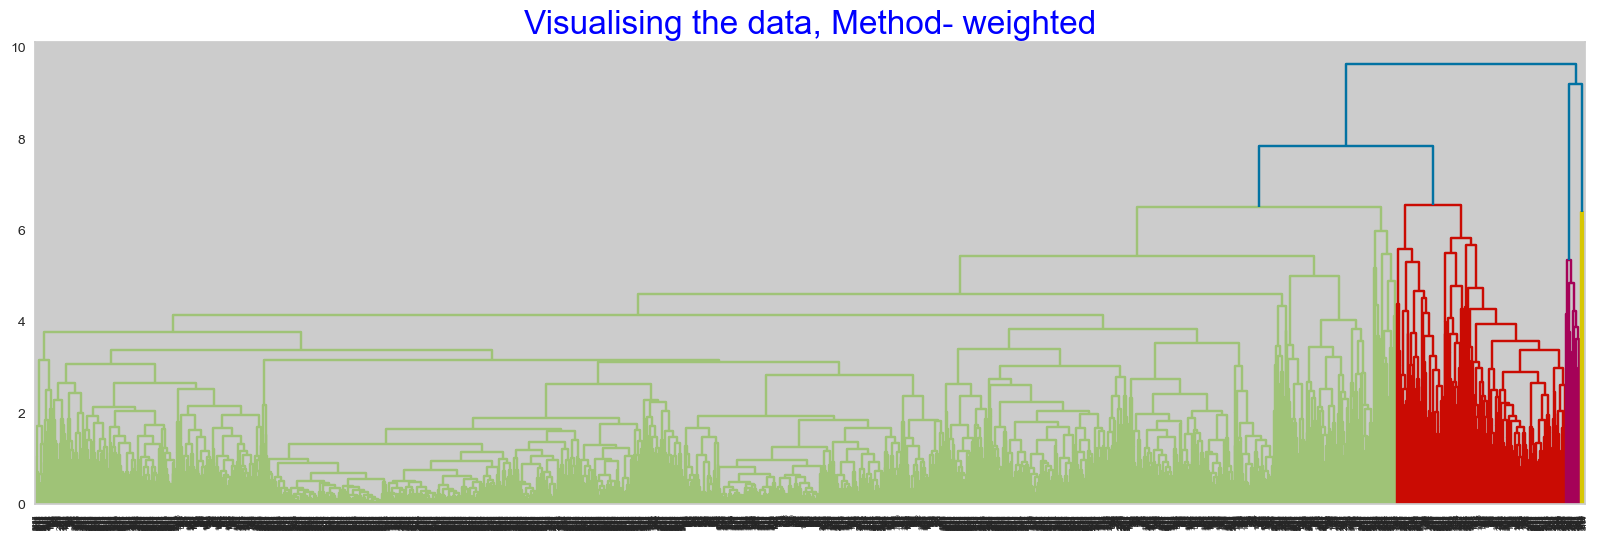

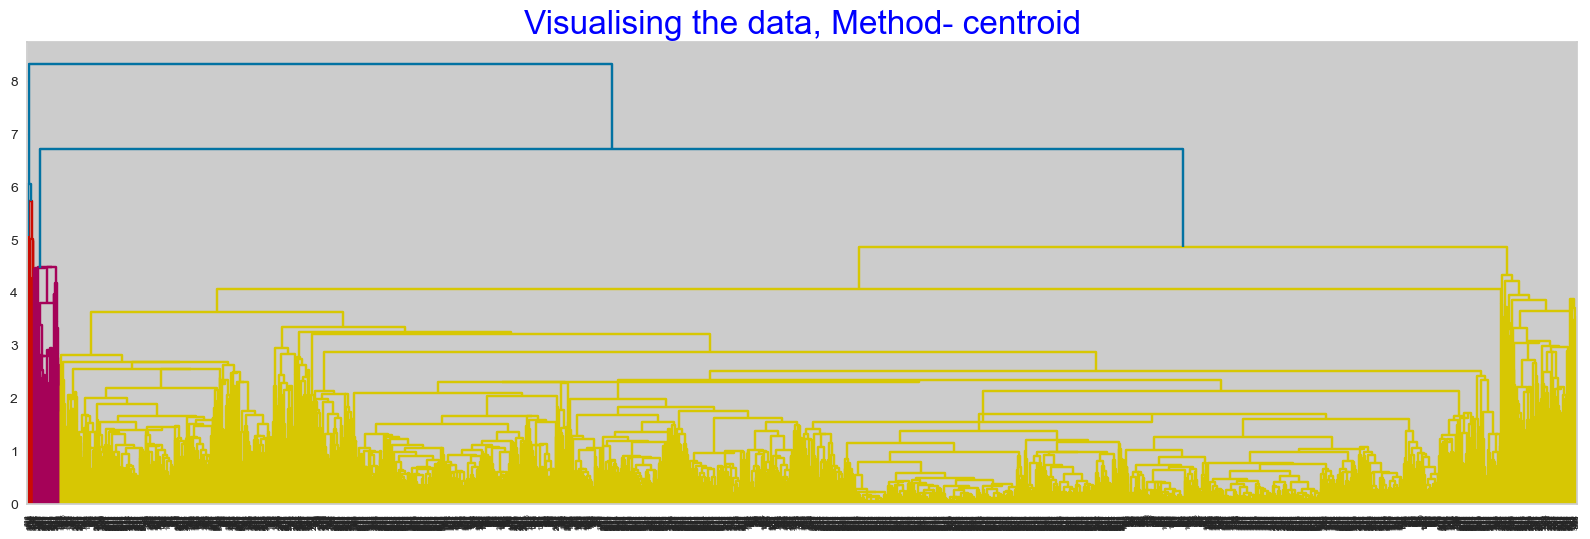

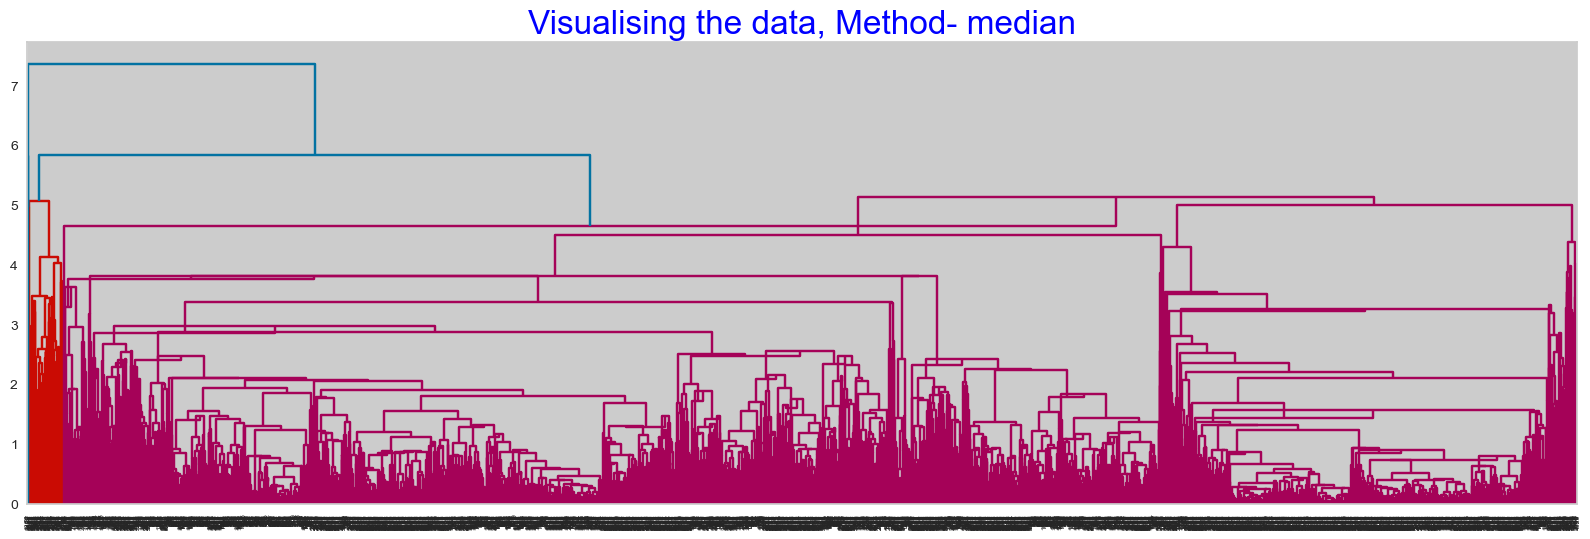

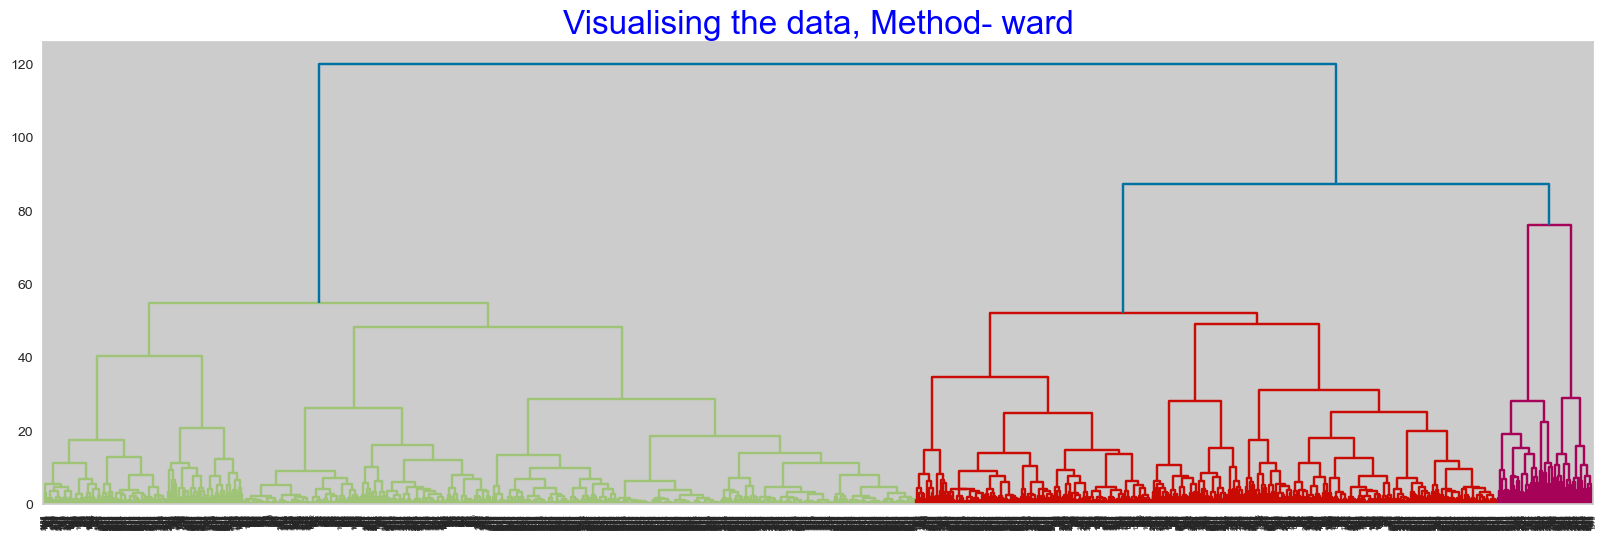

In [52]:
import scipy.cluster.hierarchy as sch
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(std_df, method = methods,optimal_ordering=False))

In [53]:

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(std_df)
        silhouette_score1 = sil(std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.27178200672336955
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.5660072584870236
For n_clusters = 2 The average silhouette_score with linkage- average : 0.608369281294124
For n_clusters = 2 The average silhouette_score with linkage- single : 0.7173683628874836

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.284293155306053
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.45561218909267986
For n_clusters = 3 The average silhouette_score with linkage- average : 0.5381775317280956
For n_clusters = 3 The average silhouette_score with linkage- single : 0.5698748147139715

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.29734142594838214
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4546086251935117
For n_clusters = 4 The average silhouette_score with linkage- average : 0.5138193689345323
For 

In [54]:
# applying PCA on std_df
# we are considering 95% variance in n_components to not loose any data.
from sklearn.decomposition import PCA
pca_std = PCA(random_state=10, n_components=0.95)
pca_std_df= pca_std.fit_transform(std_df)

In [55]:
# eigenvalues..

print(pca_std.singular_values_)

[107.23656839  81.18515261  60.05369189  59.08396039  56.43912906
  45.22293666  38.39015291]


In [56]:
# variance containing in each formed PCA

print(pca_std.explained_variance_ratio_*100)

[35.20921466 20.18012003 11.042056   10.68832668  9.75284066  6.26163926
  4.51242718]


In [57]:
# Cummulative variance ratio..

# this will give an idea of, at how many no. of PCAs, the cummulative addition of
#........variance will give much information..

cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

array([35.20921466, 55.38933469, 66.43139069, 77.11971737, 86.87255803,
       93.1341973 , 97.64662447])

In [58]:
n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_std_df)
        silhouette_score1 = sil(pca_std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.2705984830876779
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.5630878490583142
For n_clusters = 2 The average silhouette_score with linkage- average : 0.5633933216094562
For n_clusters = 2 The average silhouette_score with linkage- single : 0.7207129263453944

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.2760819684250189
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.5414660319051811
For n_clusters = 3 The average silhouette_score with linkage- average : 0.5317393554627169
For n_clusters = 3 The average silhouette_score with linkage- single : 0.6539947144848145

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.2929877997088711
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.44148291781812304
For n_clusters = 4 The average silhouette_score with linkage- average : 0.524037757669537
For n

In [59]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(pca_std_df)
print(y_pred_hie.shape)
y_pred_hie

(3629,)


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [60]:
# Cluster numbers

agg_clustering.n_clusters_

2

In [61]:
# Clustering Score

(sil(pca_std_df, agg_clustering.labels_)*100).round(3)

27.06

In [62]:
# Concating Labels with main dataset copy

df['Hierarchical_labels'] = agg_clustering.labels_
df.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  \
0            1                  0                0               7000      0   
1            2                  0                0               6968      0   
2            4                  0                0               7034      0   
3            1                  0                0               6952      0   
4           26               2077                4               6935      1   

   Kmeans_label  Hierarchical_labels  
0             0                    1  
1             0                    1  
2             0                    1  
3             0                    1  
4             1                    0

In [63]:
df.groupby('Hierarchical_labels').agg(['mean'])

ID#        Balance  Qual_miles cc1_miles  \
                            mean           mean        mean      mean   
Hierarchical_labels                                                     
0                    1764.511938  101059.341994  100.907303  3.109551   
1                    2222.230839   34365.483900    0.000000  1.279365   

                    cc2_miles cc3_miles   Bonus_miles Bonus_trans  \
                         mean      mean          mean        mean   
Hierarchical_labels                                                 
0                         1.0       1.0  29075.598315   15.619382   
1                         1.0       1.0   4762.981406    7.139683   

                    Flight_miles_12mo Flight_trans_12 Days_since_enroll  \
                                 mean            mean              mean   
Hierarchical_labels                                                       
0                          542.381320        1.597612       4574.502107   
1                           71.017234        0.260771       3731.819501   

                        Award Kmeans_label  
                         mean         mean  
Hierarchical_labels                         
0                    0.457865     0.736657  
1                    0.264399     0.107029

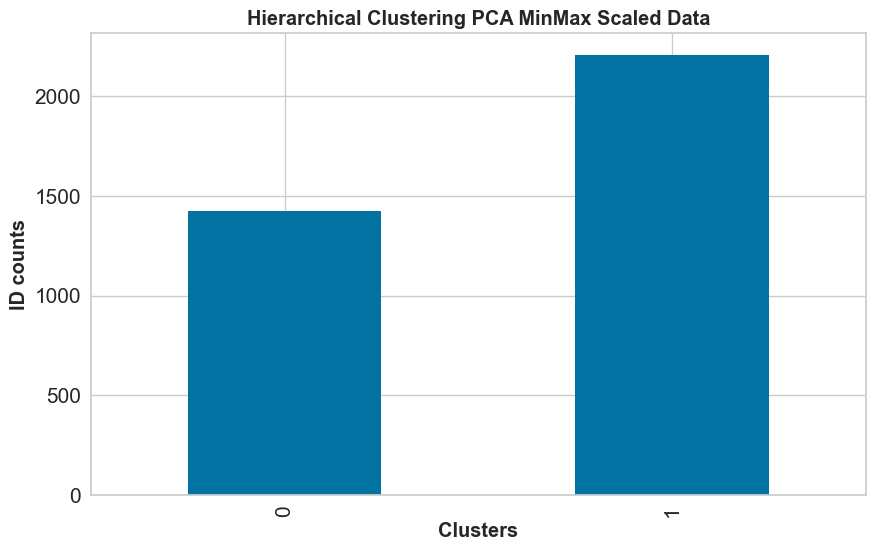

In [64]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster
df = df.reset_index()
fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(['Hierarchical_labels']).count()['ID#'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering PCA MinMax Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [65]:
epsilon = [0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75]
min_samples = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(std_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 2.75 
min_sample= 3 
number of clusters= 1 
average silhouette score= 0.5789


In [66]:
dbscan = DBSCAN(eps=2.5, min_samples=21)
dbscan.fit(std_df)

DBSCAN(eps=2.5, min_samples=21)

In [67]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [68]:
df

index   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0         0     1    28143           0          1          1          1   
1         1     2    19244           0          1          1          1   
2         2     3    41354           0          1          1          1   
3         3     4    14776           0          1          1          1   
4         4     5    97752           0          4          1          1   
...     ...   ...      ...         ...        ...        ...        ...   
3624   3624  4017    18476           0          1          1          1   
3625   3625  4018    64385           0          1          1          1   
3626   3626  4019    73597           0          3          1          1   
3627   3627  4020    54899           0          1          1          1   
3628   3628  4021     3016           0          1          1          1   

      Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
0             174            1                  0                0   
1             215            2                  0                0   
2            4123            4                  0                0   
3             500            1                  0                0   
4           43300           26               2077                4   
...           ...          ...                ...              ...   
3624         8525            4                200                1   
3625          981            5                  0                0   
3626        25447            8                  0                0   
3627          500            1                500                1   
3628            0            0                  0                0   

      Days_since_enroll  Award  Kmeans_label  Hierarchical_labels  
0                  7000      0             0                    1  
1                  6968      0             0                    1  
2                  7034      0             0                    1  
3                  6952      0             0                    1  
4                  6935      1             1                    0  
...                 ...    ...           ...                  ...  
3624               1403      1             0                    1  
3625               1395      1             0                    1  
3626               1402      1             1                    1  
3627               1401      0             0                    1  
3628               1398      0             0                    1  

[3629 rows x 15 columns]

In [69]:
df['DBSCAN_labels'] = dbscan.labels_

In [70]:
df.groupby('DBSCAN_labels').agg(['mean'])

index          ID#        Balance   Qual_miles cc1_miles  \
                      mean         mean           mean         mean      mean   
DBSCAN_labels                                                                   
-1             1666.087719  1880.482456  122246.307018  1085.675439  2.263158   
 0             1818.797155  2047.883073   58534.371550     5.668563  1.988905   

              cc2_miles cc3_miles   Bonus_miles Bonus_trans Flight_miles_12mo  \
                   mean      mean          mean        mean              mean   
DBSCAN_labels                                                                   
-1                  1.0       1.0  23445.333333   15.912281       1487.789474   
 0                  1.0       1.0  14006.616785   10.290469        216.027312   

              Flight_trans_12 Days_since_enroll     Award Kmeans_label  \
                         mean              mean      mean         mean   
DBSCAN_labels                                                            
-1                   4.192982       4377.500000  0.622807     0.631579   
 0                   0.674822       4052.266856  0.331152     0.345092   

              Hierarchical_labels  
                             mean  
DBSCAN_labels                      
-1                       0.000000  
 0                       0.627312

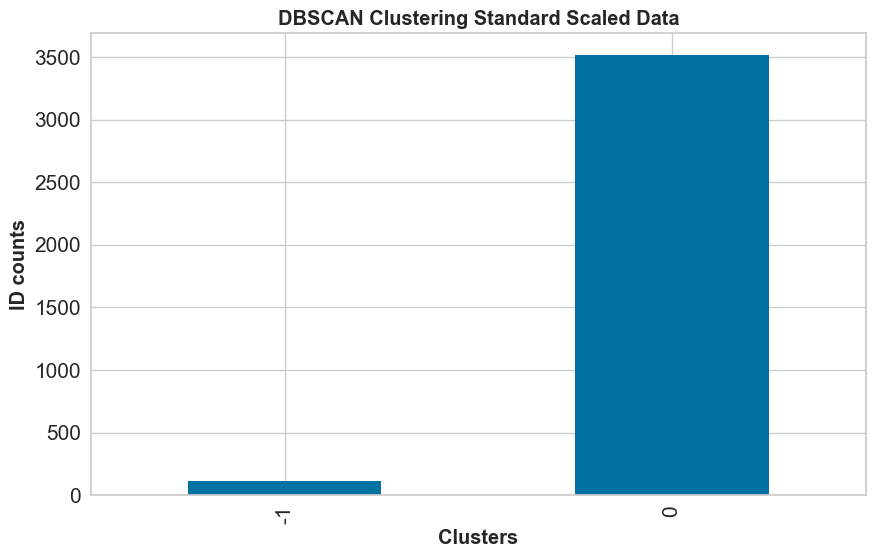

In [71]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster
df = df.reset_index()
fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(['DBSCAN_labels']).count()['ID#'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering Standard Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [72]:
from itertools import product

eps_values = np.arange(0.25,1.25,0.25) # eps values to be investigated
min_samples = np.arange(3,23) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [73]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(std_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(std_df, DBS_clustering.labels_))

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


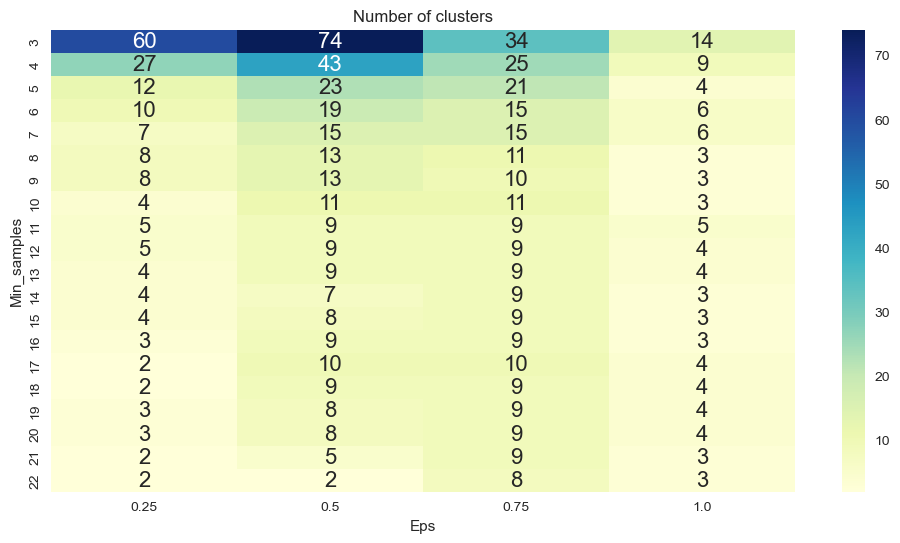

In [74]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

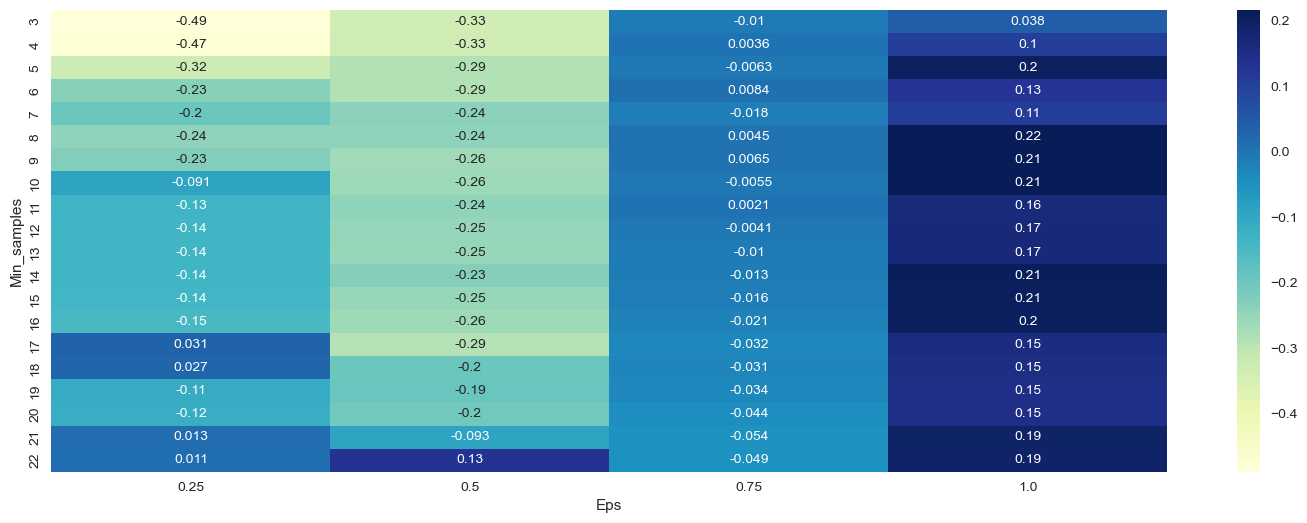

In [75]:
import pandas as pd
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [76]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(df.loc[df.DBSCAN_labels==0].mean(),columns= ['Cluster1_avg'])
cluster1

Cluster1_avg
level_0               1818.797155
index                 1818.797155
ID#                   2047.883073
Balance              58534.371550
Qual_miles               5.668563
cc1_miles                1.988905
cc2_miles                1.000000
cc3_miles                1.000000
Bonus_miles          14006.616785
Bonus_trans             10.290469
Flight_miles_12mo      216.027312
Flight_trans_12          0.674822
Days_since_enroll     4052.266856
Award                    0.331152
Kmeans_label             0.345092
Hierarchical_labels      0.627312
DBSCAN_labels            0.000000

In [81]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

# Load the dataset
df = pd.read_excel('../Clustering/EastWestAirlines.xlsx', sheet_name="data")  # Replace 'your_dataset.csv' with the path to your data


In [82]:
# Data Preprocessing

# 1. Handling missing values (e.g., filling with median or dropping)
df.fillna(df.median(), inplace=True)

# 2. Remove outliers using Z-score
from scipy.stats import zscore
z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))  # Only apply to numeric columns
df = df[(z_scores < 3).all(axis=1)]


In [83]:
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3630 rows x 12 columns]

In [84]:
# 3. Feature scaling
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.select_dtypes(include=[np.number]))  # Only scale numeric columns



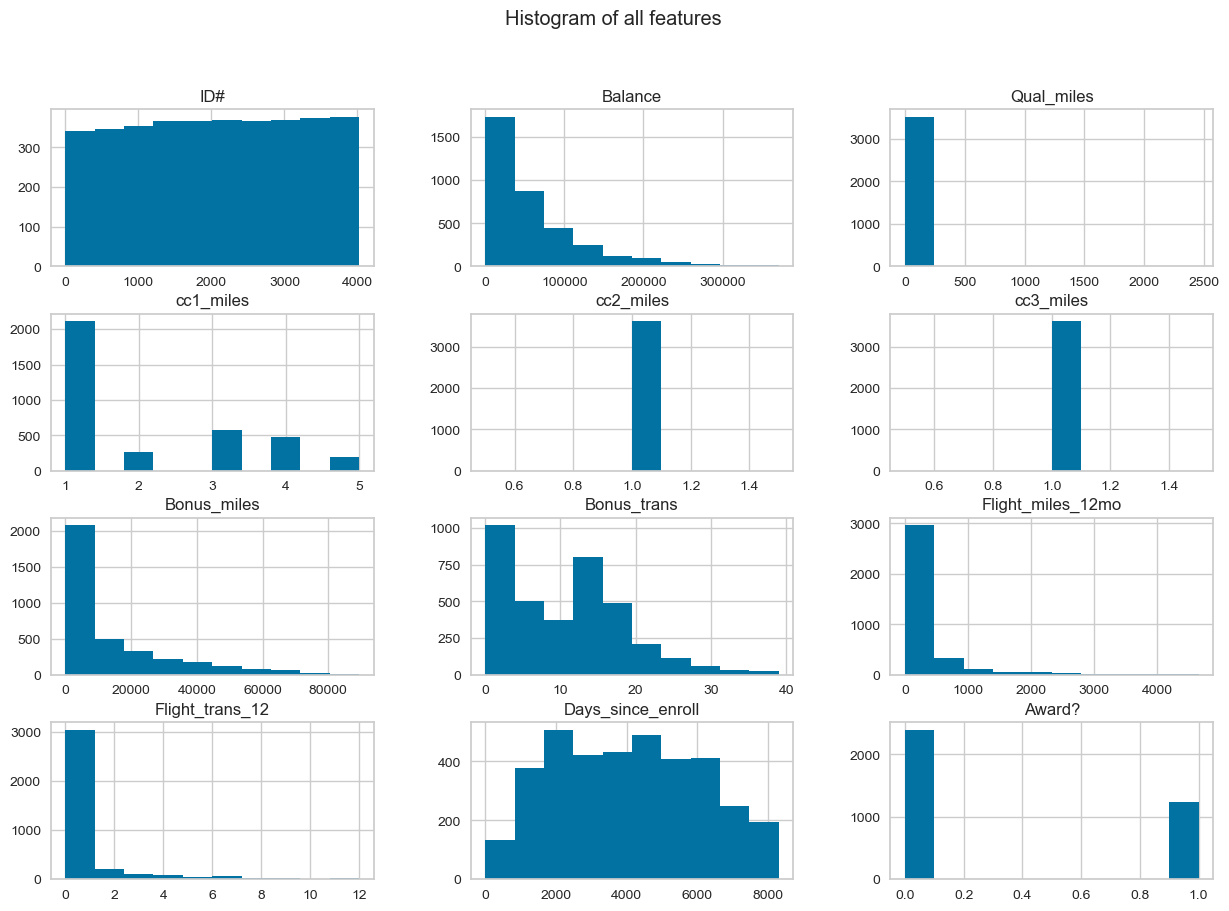

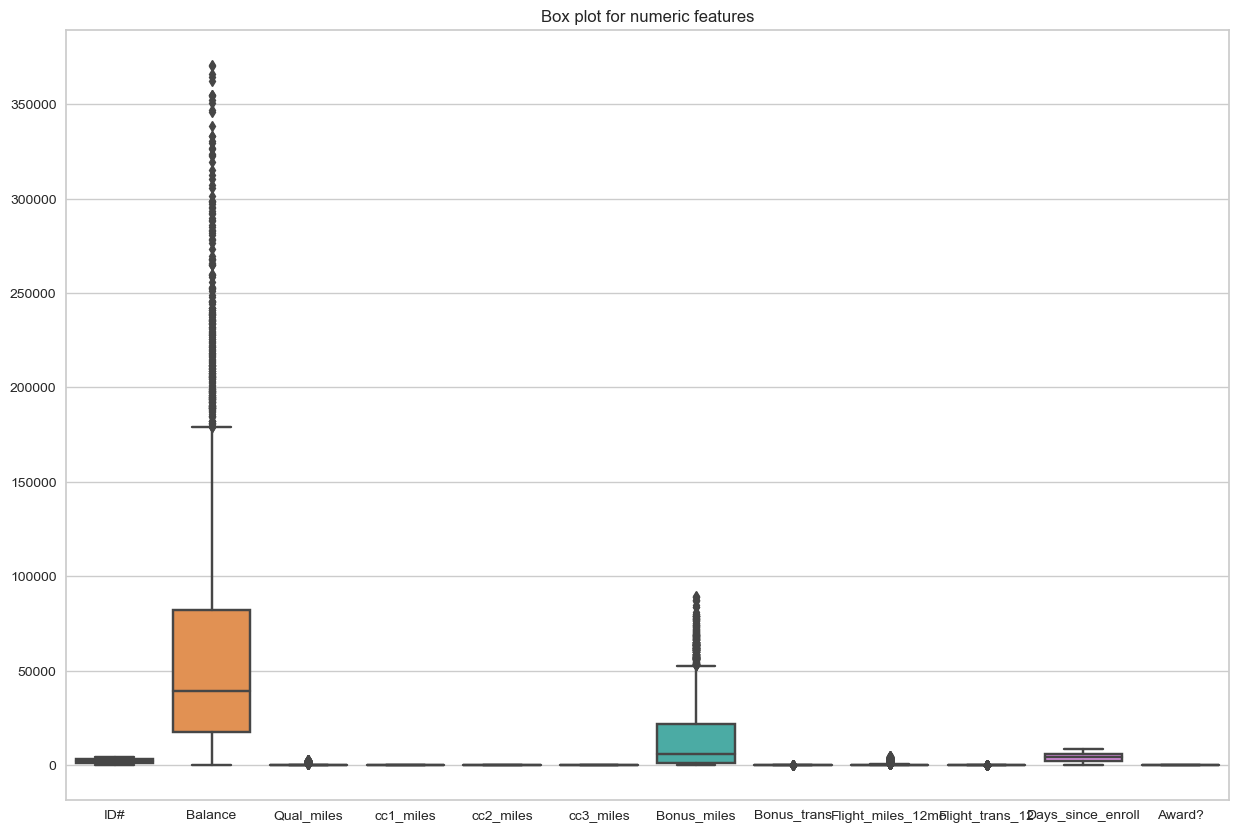

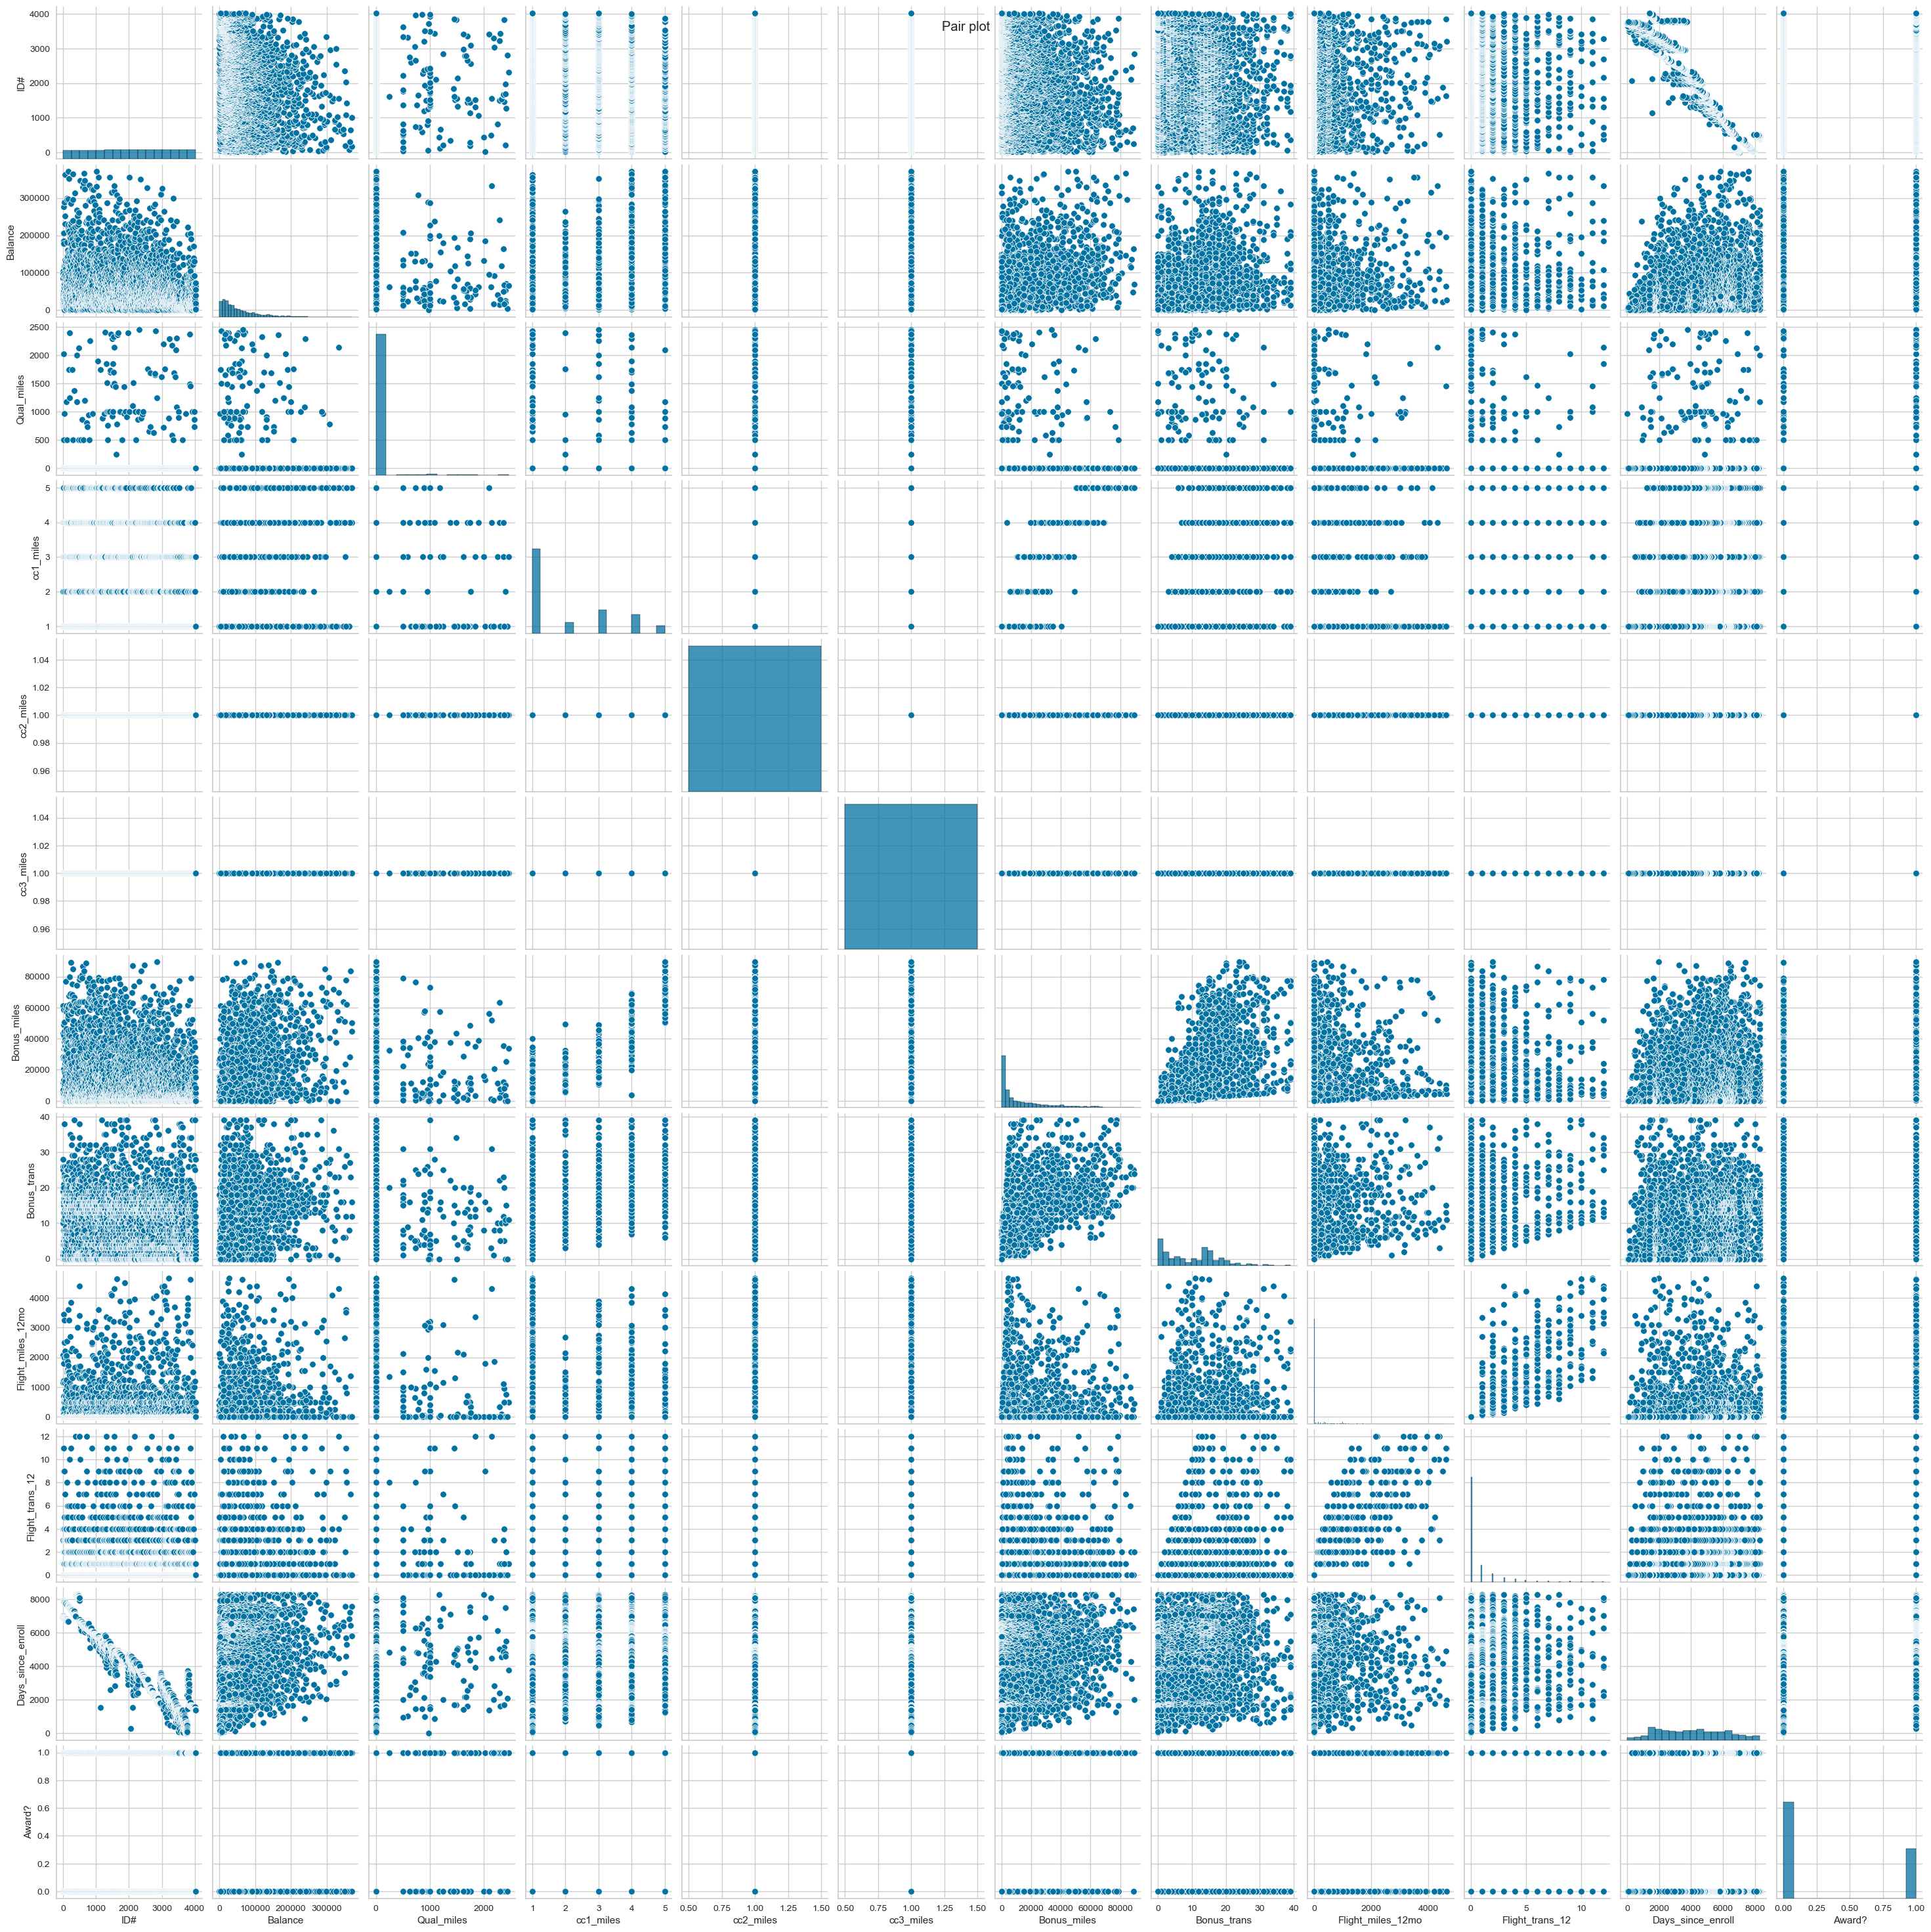

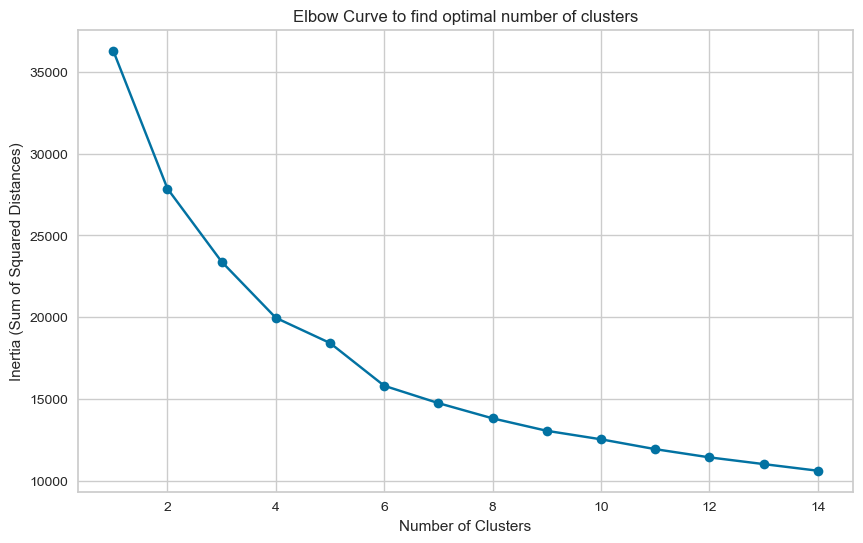

Silhouette Score for KMeans with 3 clusters: 0.29192710837860614


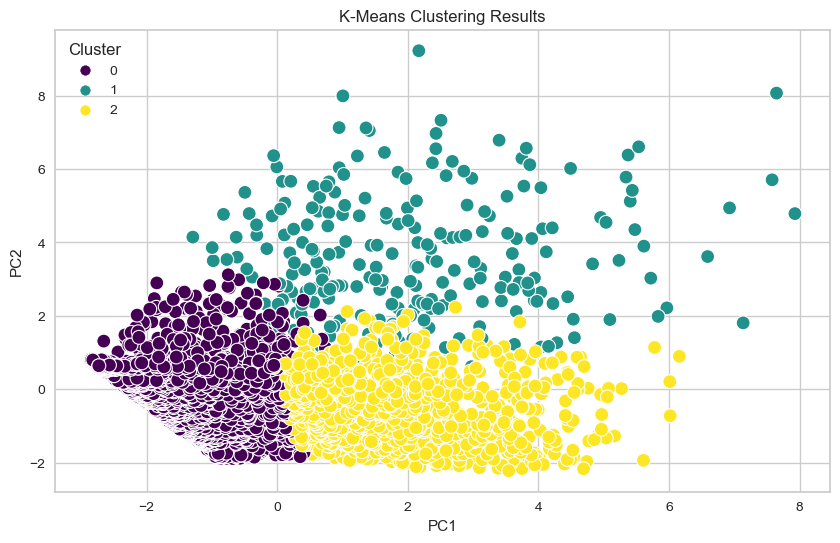

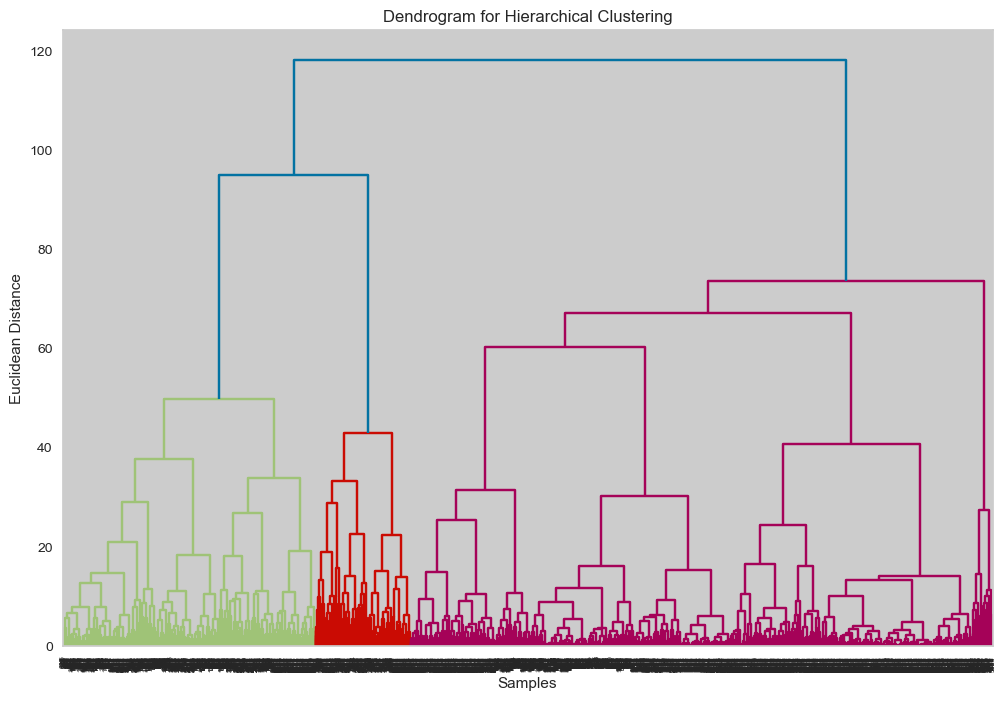

K-Means Cluster Counts:
0    2196
2    1183
1     251
Name: KMeans_Cluster, dtype: int64

Hierarchical Cluster Counts:
1    2272
3     987
2     371
Name: Hierarchical_Cluster, dtype: int64

K-Means Cluster Analysis:
                        ID#       Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                
0               2331.734973  36542.100638   27.233151   1.186248        1.0   
1               1926.426295  97169.737052  159.533865   2.015936        1.0   
2               1532.172443  97252.187658   37.062553   3.498732        1.0   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                     1.0   3970.405282     6.167122          96.213115   
1                     1.0  19085.649402    15.924303        2186.924303   
2                     1.0  32456.904480    17.282333         142.639053   

           

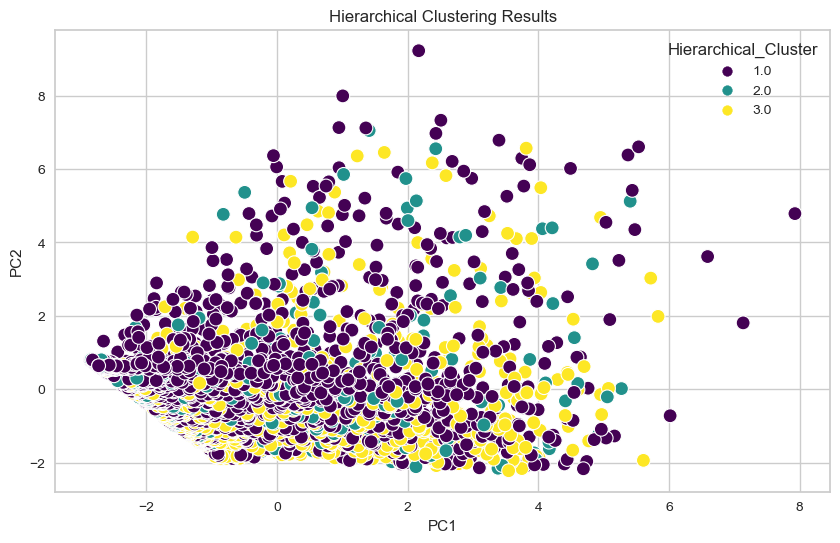

In [85]:
# Exploratory Data Analysis (EDA)

# Histograms
df.hist(bins=10, figsize=(15, 10))
plt.suptitle("Histogram of all features")
plt.show()

# Box plots to check distribution and outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title("Box plot for numeric features")
plt.show()

# Pair plots for checking clusters visually (select only a few features if dataset is large)
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.suptitle("Pair plot")
plt.show()

# Implementing K-Means Clustering

# Determine the optimal number of clusters using the Elbow Method
cluster_range = range(1, 15)
cluster_errors = []

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
    kmeans.fit(scaled_df)
    cluster_errors.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, cluster_errors, marker='o')
plt.title("Elbow Curve to find optimal number of clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.show()

# Choosing optimal number of clusters (e.g., 3 based on the Elbow plot)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)

# Adding cluster labels to the original dataframe
df['KMeans_Cluster'] = kmeans_labels

# Calculate Silhouette Score
silhouette_avg = silhouette_score(scaled_df, kmeans_labels)
print(f"Silhouette Score for KMeans with {optimal_clusters} clusters: {silhouette_avg}")

# Visualize clusters (using first two principal components)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_df = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(pca_df, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100)
plt.title("K-Means Clustering Results")
plt.show()

# Implementing Hierarchical Clustering

# Using linkage for hierarchical clustering and creating dendrogram
linkage_type = 'ward'  # Experiment with other types like 'single', 'complete', 'average'
linked = linkage(scaled_df, method=linkage_type)

plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()

# Cutting the dendrogram to form clusters
hierarchical_clusters = 3  # Decide based on dendrogram
df['Hierarchical_Cluster'] = fcluster(linked, hierarchical_clusters, criterion='maxclust')

# Cluster Analysis and Interpretation

# Print cluster sizes
print("K-Means Cluster Counts:")
print(df['KMeans_Cluster'].value_counts())
print("\nHierarchical Cluster Counts:")
print(df['Hierarchical_Cluster'].value_counts())

# Analyze cluster characteristics by comparing feature means
print("\nK-Means Cluster Analysis:")
print(df.groupby('KMeans_Cluster').mean())

print("\nHierarchical Cluster Analysis:")
print(df.groupby('Hierarchical_Cluster').mean())

# Visualize Clusters from Hierarchical Clustering in PCA
pca_df['Hierarchical_Cluster'] = df['Hierarchical_Cluster']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Hierarchical_Cluster', palette='viridis', s=100)
plt.title("Hierarchical Clustering Results")
plt.show()

# Conclusions
# Based on the means of each cluster and silhouette scores, you can draw conclusions about cluster characteristics.
# Look for distinguishing characteristics of each cluster based on the features and summarize in comments.
